# Concevez une application au service de la santé publique

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
    
1.   [Data loading](#0)<br>

2.  [ Univariate Analysis](#1)<br>

    2.1 [ Distributions](#dist)<br>
    2.2 [Boxplot](#box) <br>
    2.3 [Histogram](#hist) <br>
    2.4 [Categorical features analysis](#cat) <br>
    
    * [Pie Plot](#pie) <br>
    * [Countplot](#count) <br>
    * [Exploritory Data Analysis](#catdesc)<br>
 
3.  [Bivariate analysis](#2) <br>

    3.1 [Line plot](#line)<br>
    3.2 [Paire plot : Scatter plot, Histplot, and kernel density estimate (KDE) plot](#paire) <br>
    3.3 [Correlation analysis](#corr) <br>

4.  [Multivariate Analysis ](#3) <br>

    3.1 [Principal Components Analysis (PCA)](#pca)<br>
    3.2 [Multiple Correspondence Analysis (MCA)](#mca) <br>

5.  [Statistics tests ](#4) <br>

    3.1 [Chi2 Test](#chi)<br>
    3.2 [Normalité Test](#norm) <br>
    3.3 [Analysis Of Variance (ANOVA)](#anova) <br>



</div>

In [1]:
#Let's import all the dependancies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Data loading<a id="0"></a>

In [2]:
data = pd.read_csv("data_clean.csv", low_memory=False)
data.shape

(106992, 50)

In [3]:
data.describe()

,energy_100g,proteins_100g,salt_100g,sodium_100g,ingredients_that_may_be_from_palm_oil_n,ingredients_from_palm_oil_n,additives_n,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,fiber_100g,cholesterol_100g,trans-fat_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g
count,106992.000000,106992.000000,106992.000000,106992.000000,106992.000000,106992.000000,106992.000000,106992.000000,106992.000000,106992.000000,106992.000000,106992.000000,79705.000000,106992.000000,106992.000000,106992.0,106992.000000,106992.000000,106992.000000,106992.000000
mean,1022.628495,5.512942,0.744937,0.293338,1.523858,1.523858,1.523858,15.335281,10.151391,31.708969,3.839876,9.580881,10.011906,1.523858,0.025341,0.0,0.079230,0.001203,0.001225,0.000078
std,683.848948,5.276585,0.714099,0.281106,1.681343,1.681343,1.681343,17.219232,10.608315,25.182438,4.493225,7.250757,7.929099,1.681343,0.016053,0.0,0.042555,0.001718,0.000760,0.000048
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,418.000000,1.000000,0.121920,0.048000,0.400000,0.400000,0.400000,2.820000,0.830000,9.120000,0.700000,3.000000,2.000000,0.400000,0.006000,0.0,0.057334,0.000000,0.001241,0.000028
50%,1022.129942,5.000000,0.591820,0.233000,1.100000,1.100000,1.100000,8.700000,8.299000,30.000000,2.330000,10.176815,10.000000,1.100000,0.035390,0.0,0.099924,0.001014,0.001241,0.000108
75%,1569.000000,7.370000,1.100000,0.433071,1.800000,1.800000,1.800000,22.730000,15.250000,52.630000,5.000000,14.000000,16.000000,1.800000,0.035390,0.0,0.099924,0.001014,0.001241,0.000108
max,3636.000000,24.000000,3.131820,1.233000,8.240000,8.240000,8.240000,70.500000,55.100000,99.800000,19.720000,35.000000,35.000000,8.240000,0.062100,0.0,0.222000,0.012500,0.005070,0.000208


In [4]:
 #We define a set of color we will use

colors_nutri = ['#038141', '#85bb2f', '#fecb02', '#ee8100', '#e63e11']
colors_nutri_nosort = ['#ee8100', '#85bb2f', '#038141', '#fecb02', '#e63e11']

# Univariate Analysis <a id="1"></a>

In [150]:
features = ['energy_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'sugars_100g',
             'fat_100g', 'carbohydrates_100g', 'saturated-fat_100g', 'nutrition-score-fr_100g',"additives_n", 'fiber_100g']

## Distributions <a id="dist"></a>

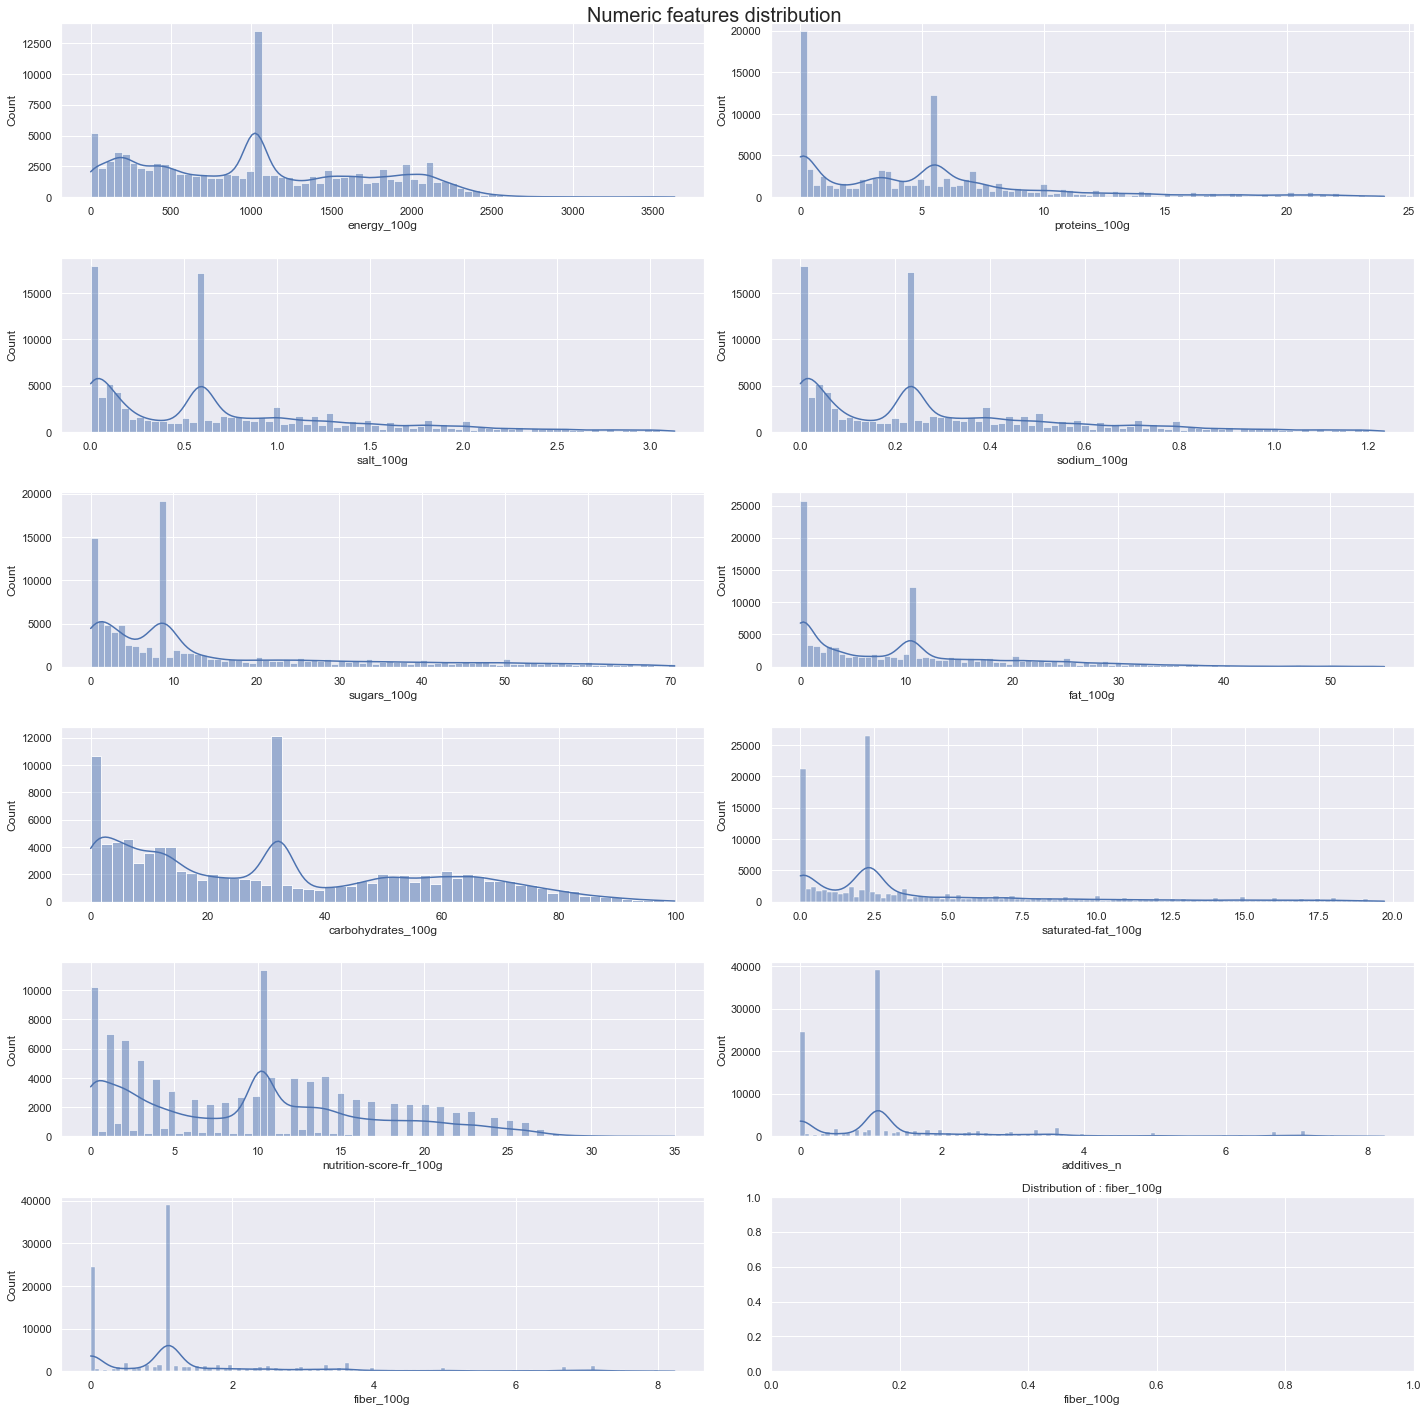

In [151]:
df=data
N = len(features)
fig, ax = plt.subplots(int(np.ceil(N/2)),2, figsize=(20,20))
plt.suptitle('Numeric features distribution', size=20)
ytop = 0.96-0.4*np.exp(-N/5)
plt.subplots_adjust(top=ytop)
for feature, subplot in zip(features, ax.flatten()):
    sns.set(font_scale=1)
    sns.histplot(df[feature],  kde=True, ax=subplot)
    plt.title('Distribution of : {}'.format(feature))
    plt.xlabel(feature, size=12)

fig.tight_layout()
plt.show()

## Boxplot <a id="box"></a>

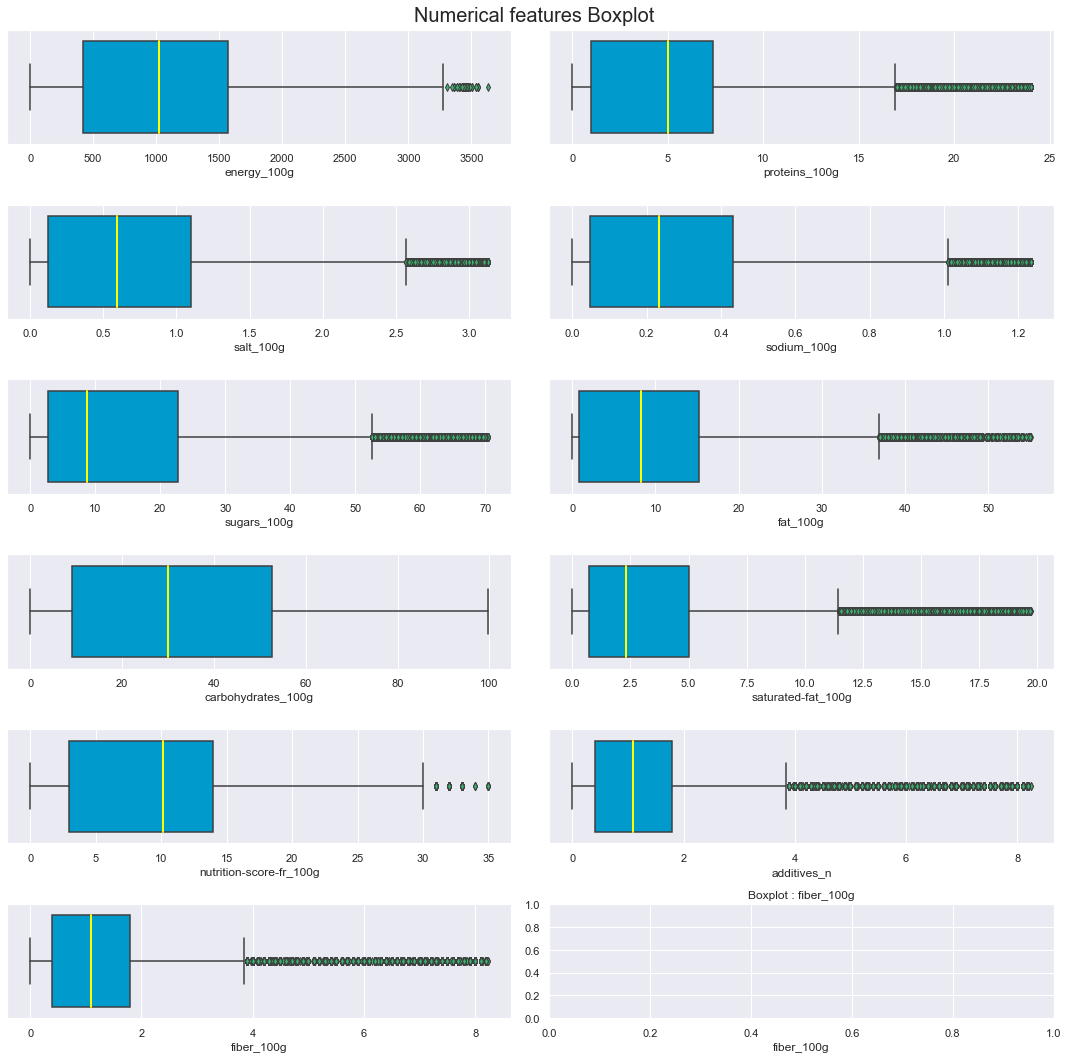

In [152]:

N = len(features)
fig, ax = plt.subplots(int(np.ceil(N/2)),2, figsize=(15,15))
plt.suptitle('Numerical features Boxplot', size=20)
ytop = 0.96-0.4*np.exp(-N/5)
plt.subplots_adjust(top=ytop)
medianprops = dict(linestyle="-", linewidth=2, color="yellow")
for feature, subplot in zip(features, ax.flatten()):
    sns.set(font_scale=1)
    sns.boxplot(x=df[feature], color='#009ACD', saturation=1, medianprops=medianprops, flierprops={"markerfacecolor": "mediumseagreen"}, whis=1.5, ax=subplot)
    plt.title('Boxplot : {}'.format(feature))
    plt.xlabel(feature, size=12)
fig.tight_layout()
plt.show()

## Histogram <a id="hist"></a>

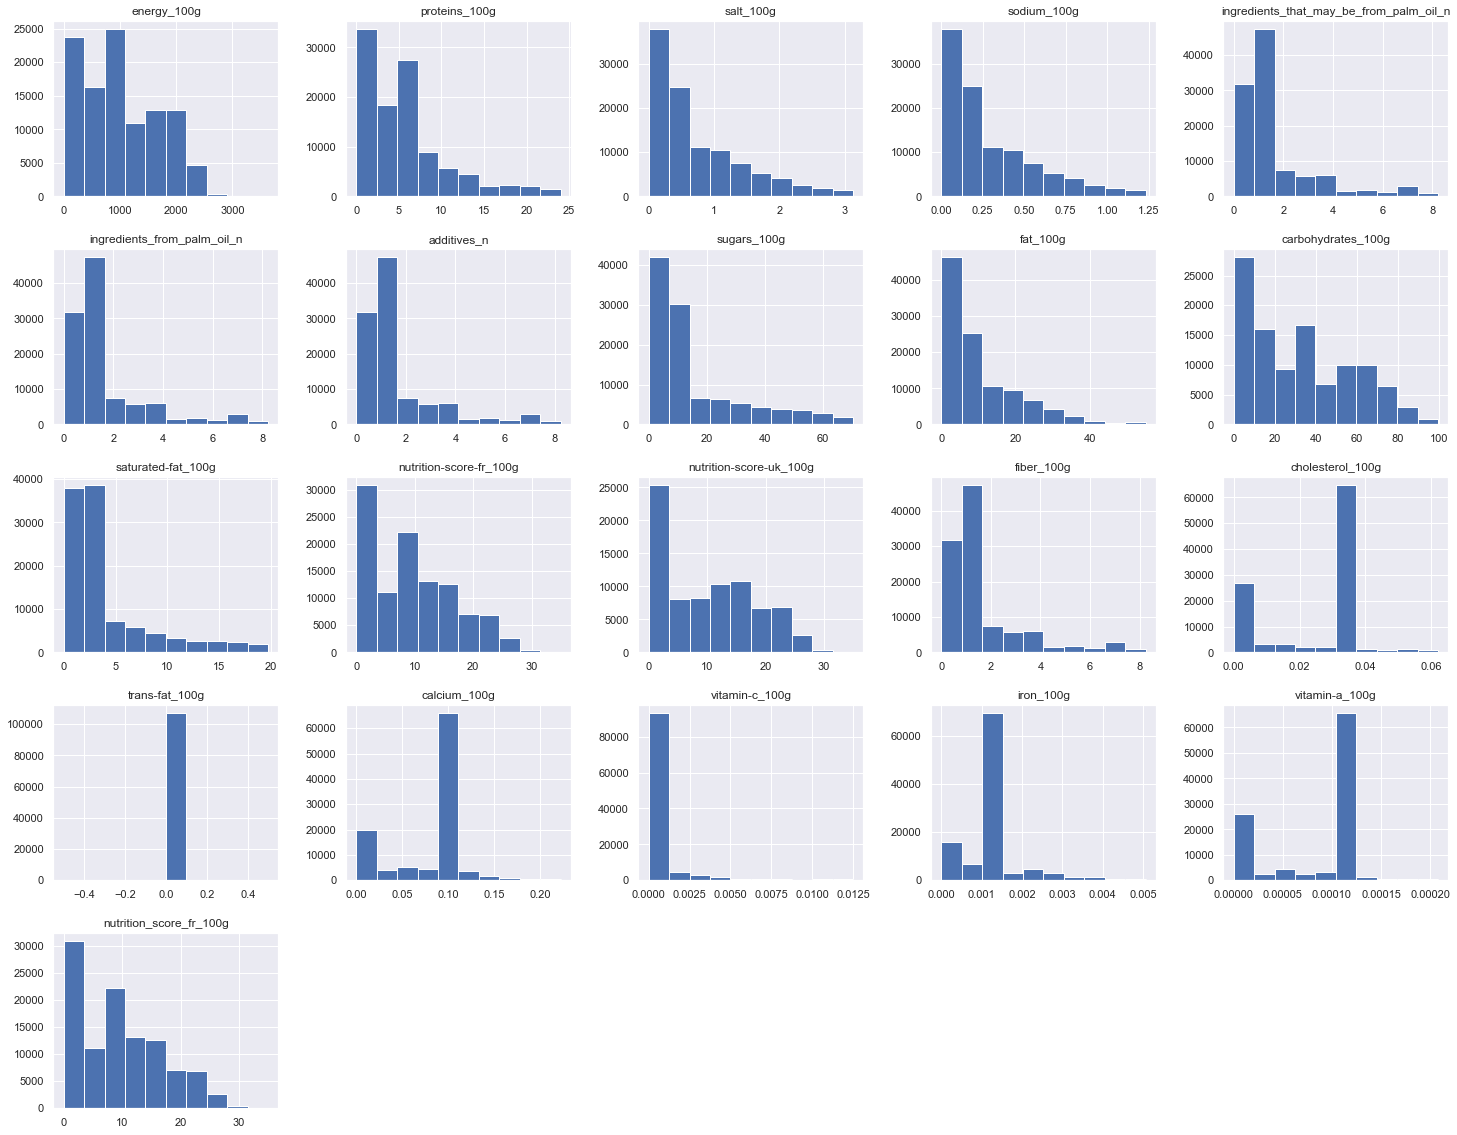

In [153]:
data.hist(figsize=(25,20), layout=(5,5))
plt.show()

## Categorical features analysis <a id="cat"></a>

### Pie Plot <a id="pie"></a>

In [154]:
def trace_pieplot(dataframe, variable, titre, legende, liste_colors):


    plt.figure(figsize=(7, 7))
    plt.title(titre, size=16)
    nb_par_var = dataframe[variable].sort_values().value_counts()
    nb_par_var = nb_par_var.loc[sorted(nb_par_var.index)]
    explode = [0.03]
    for i in range(len(nb_par_var) - 1):
        explode.append(0.03)
    wedges, texts, autotexts = plt.pie(
        nb_par_var, labels=nb_par_var.index, autopct='%1.1f%%', colors=liste_colors, textprops={
            'fontsize': 16, 'color': 'black', 'backgroundcolor': 'w'}, explode=explode, shadow=True)
    axes = plt.gca()
    axes.legend(
        wedges,
        nb_par_var.index,
        title=legende,
        loc='center right',
        fontsize=14,
        bbox_to_anchor=(
            1,
            0,
            0.5,
            1))
    plt.show()

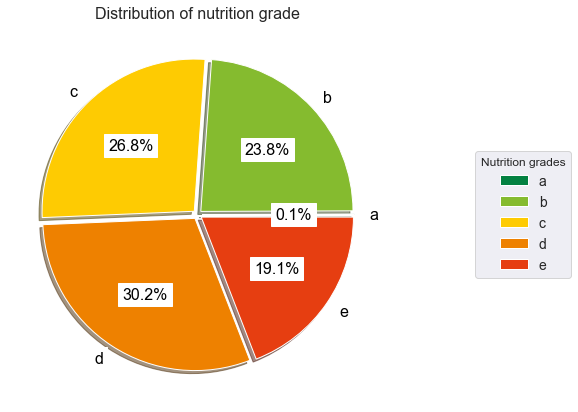

In [10]:
trace_pieplot( data, 'nutrition_grade_fr', 'Distribution of nutrition grade', 'Nutrition grades', colors_nutri)

### Countplot <a id="count"></a>

In [11]:
print("pnns group 1: ", data["pnns_groups_1"].dropna().unique())
print("pnns group 2: ", data["pnns_groups_2"].dropna().unique())

pnns group 1:  ['unknown' 'Fruits and vegetables' 'Cereals and potatoes' 'Sugary snacks'
 'Composite foods' 'Beverages' 'Fat and sauces' 'Fish Meat Eggs'
 'fruits-and-vegetables' 'Milk and dairy products' 'Salty snacks'
 'sugary-snacks' 'cereals-and-potatoes']
pnns group 2:  ['unknown' 'Vegetables' 'Bread' 'Legumes' 'Biscuits and cakes'
 'Pizza pies and quiche' 'Non-sugared beverages' 'Sweetened beverages'
 'Dressings and sauces' 'Meat' 'Sweets' 'One-dish meals' 'vegetables'
 'Soups' 'Fruits' 'Cheese' 'Chocolate products' 'Milk and yogurt'
 'Appetizers' 'Nuts' 'Dried fruits' 'Breakfast cereals' 'Cereals'
 'Fish and seafood' 'Alcoholic beverages' 'Ice cream' 'Processed meat'
 'Potatoes' 'Fats' 'Fruit juices' 'Artificially sweetened beverages'
 'pastries' 'Dairy desserts' 'Sandwich' 'Eggs' 'Tripe dishes'
 'Fruit nectars' 'fruits' 'Salty and fatty products' 'cereals']


We can see that there the class Sugary snacks is duplicated. Let's merge these twos classes.

In [12]:
data.loc[(data["pnns_groups_1"] == 'sugary-snacks'),'pnns_groups_1'] = 'Sugary snacks'

In [13]:
group_1=list(data["pnns_groups_1"].dropna().unique())
group_2=list(data["pnns_groups_2"].dropna().unique())
group_1.remove("unknown")
group_2.remove("unknown")


In [14]:
df =data.loc[data['pnns_groups_1'].isin(group_1),:]
df2 = data.loc[data['pnns_groups_2'].isin(group_2),:]
df.pnns_groups_2 = df2.pnns_groups_2

c:\Users\Adonija\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [15]:
data.loc[data['pnns_groups_1'].isin(group_1),:]['pnns_groups_1']

50        Fruits and vegetables
52         Cereals and potatoes
55         Cereals and potatoes
56                Sugary snacks
57              Composite foods
                  ...          
106982                Beverages
106984             Salty snacks
106987            Sugary snacks
106988                Beverages
106989           Fish Meat Eggs
Name: pnns_groups_1, Length: 33672, dtype: object

In [16]:
feature=["pnns_groups_1", "pnns_groups_2", "nutrition_grade_fr"]
group = df[feature].dropna()

<AxesSubplot:xlabel='pnns_groups_1', ylabel='count'>

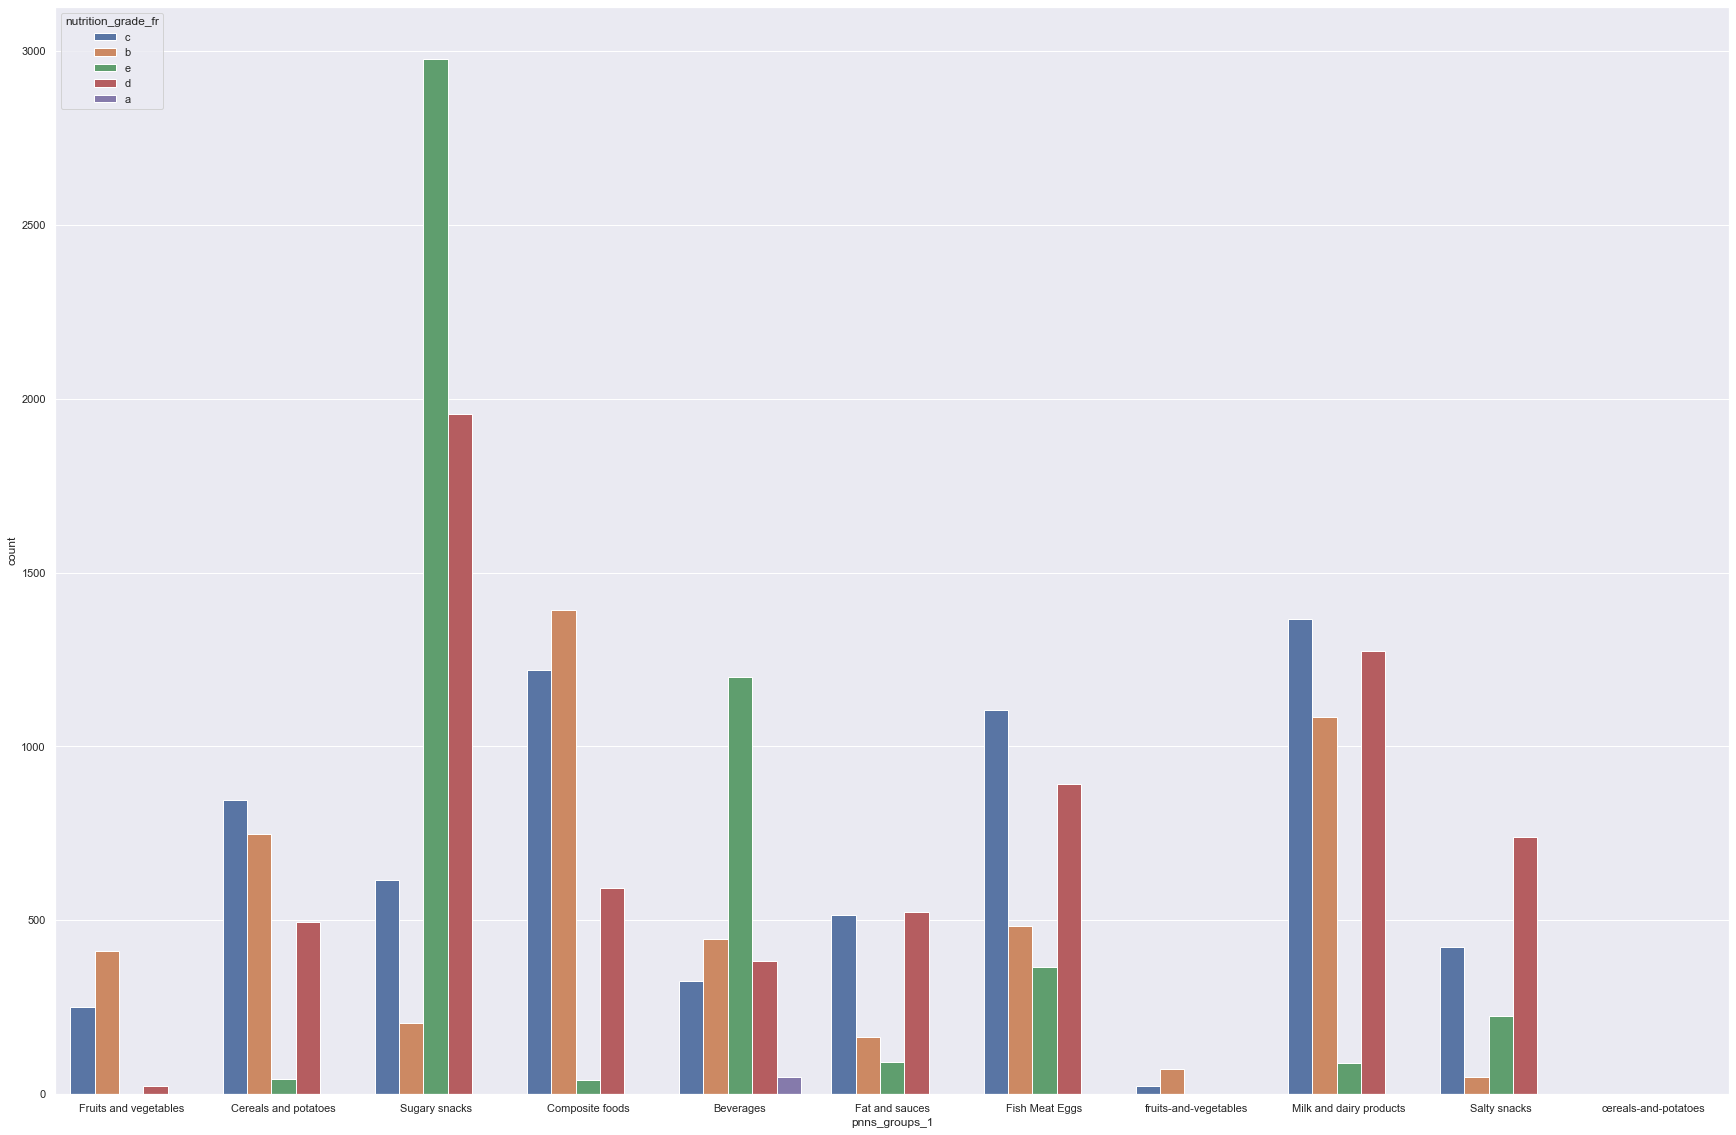

In [17]:
plt.figure(figsize=(30,20))
sns.countplot(x=data.loc[data['pnns_groups_1'].isin(group_1),:]['pnns_groups_1'],hue='nutrition_grade_fr',data=df)

In [18]:
composant_features = ['salt_100g', 'sodium_100g', 'sugars_100g', 'saturated-fat_100g', 'fiber_100g']

principal_features = ['energy_100g', 'proteins_100g', 'fat_100g', 'carbohydrates_100g',  'nutrition-score-fr_100g', 'nutrition_grade_fr', "pnns_groups_1",  "pnns_groups_2"]

discret_features = ['ingredients_that_may_be_from_palm_oil_n', 'ingredients_from_palm_oil_n','additives_n']

Other_features = ['cholesterol_100g', 'trans-fat_100g', 'calcium_100g', 'vitamin-c_100g', 'iron_100g', 'vitamin-a_100g']

In [19]:
def qualitative_clean(data, features, char=""):

    df = data.copy()
    for feature in features:
        expression = data[feature].str.split(char).apply(pd.Series, 1).stack()
        expression.index  = expression.index.droplevel(-1)
        expression.name = feature+"_expression"
        df = df.join(expression)
    
    return df

In [20]:
categorical=['additives_fr', 'countries_fr', "ingredients_text", 'categories_fr']

df = qualitative_clean(data, categorical, ",")

In [21]:
def categorical_plot(data, features, top=10, figsize=(10,10)):

    for feature in features:
        data[feature].value_counts().head(top).sort_values().plot(kind='barh', figsize=figsize, color = ['y', 'r', 'g', 'b', 'c', 'm'] )
        plt.xlabel('Frequency')
        plt.ylabel(feature)
        plt.title('The {} most used {}'.format(top, feature))
        plt.show()
    return


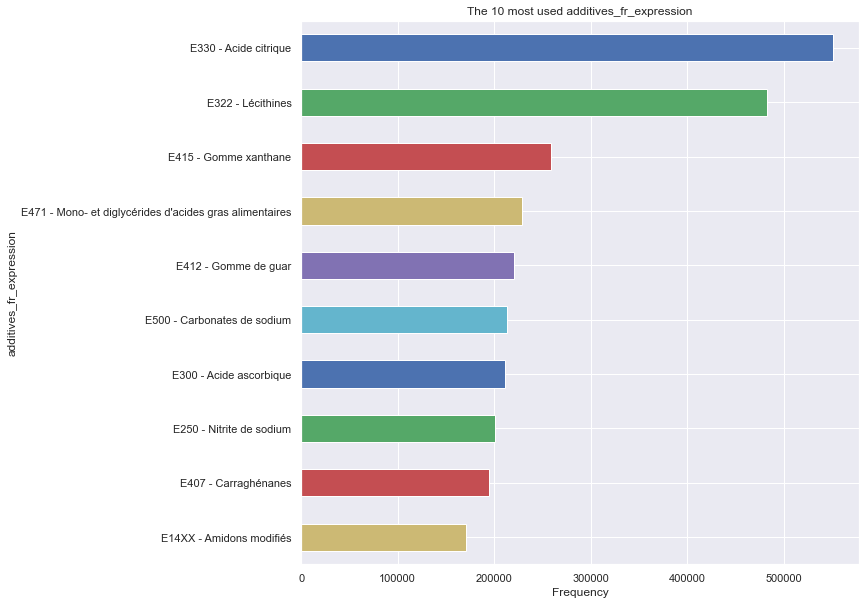

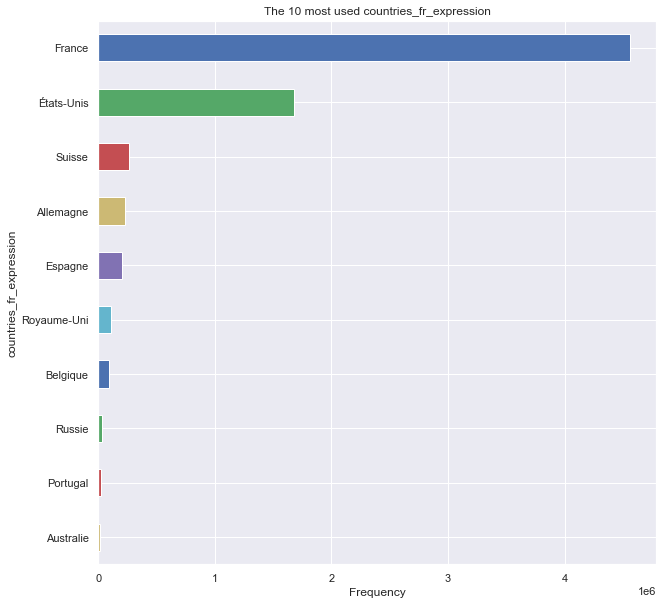

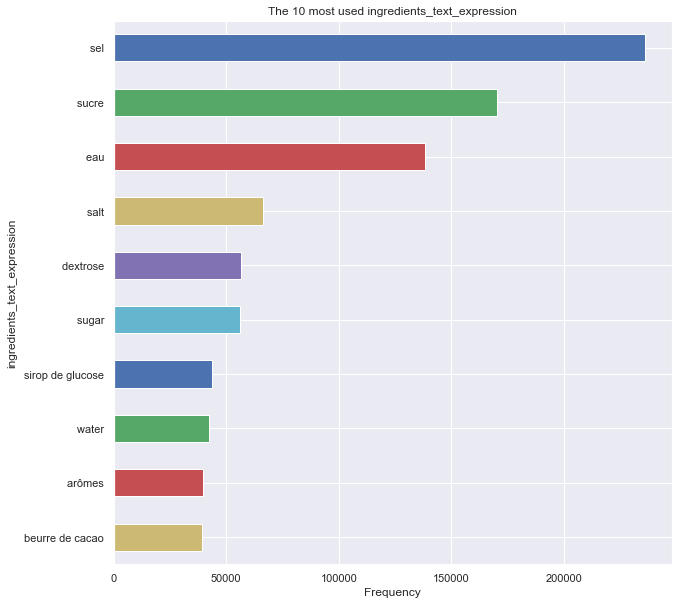

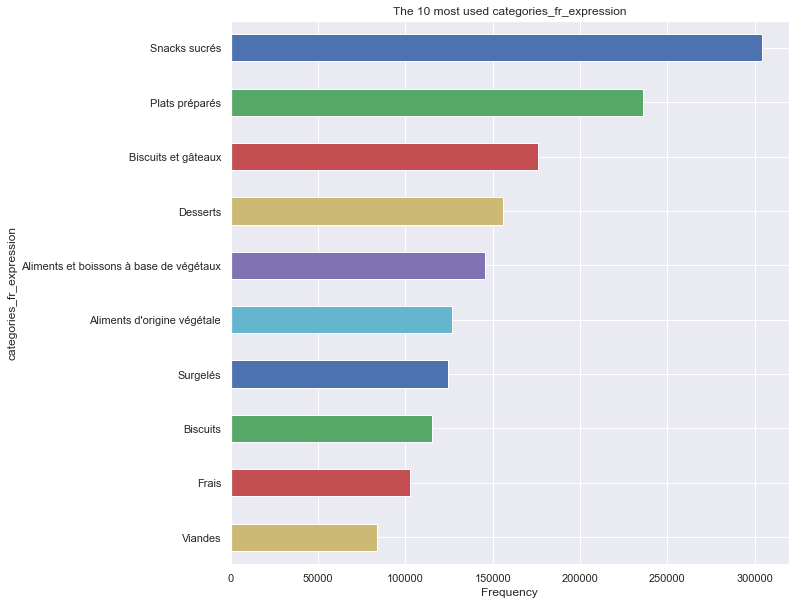

In [22]:
expression = ['additives_fr_expression', 'countries_fr_expression',  'ingredients_text_expression', 'categories_fr_expression']
categorical_plot(df,expression)

### Categorical describe <a id="catdesc"></a>

In [23]:
def categorical_describe(data, feature, threshold):

    df = data.copy()

    df = df.groupby(feature).filter(lambda x: len(x)>=threshold)
    df_grouped = df.groupby(feature)


    return df_grouped

In [24]:
additive_group = categorical_describe(df, expression[0], 10 )
additive_group.describe()

energy_100g               \
                                                  count         mean   
additives_fr_expression                                                
Colour                                            110.0  1251.463636   
E100 - Curcumine                                58444.0  1047.372607   
E1001 - Sels et esters de choline                  49.0   360.217341   
E101 - Riboflavine                             156053.0  1320.022749   
E101a - 5'-phosphate sodique de riboflavine        60.0  1022.129942   
...                                                 ...          ...   
E965ii                                            433.0  1244.798058   
E966 - Lactitol                                    49.0  1380.408163   
E967 - Xylitol                                   1132.0   773.397412   
E968 - Érythritol                                2086.0   133.170062   
E999 - Extraits de quillaia                       164.0   592.769429   

                                                                        \
                                                      std          min   
additives_fr_expression                                                  
Colour                                       1.025414e+03     4.000000   
E100 - Curcumine                             6.393590e+02     0.000000   
E1001 - Sels et esters de choline            2.254430e+02   285.000000   
E101 - Riboflavine                           5.965020e+02     0.000000   
E101a - 5'-phosphate sodique de riboflavine  1.375755e-12  1022.129942   
...                                                   ...          ...   
E965ii                                       4.171431e+02   598.000000   
E966 - Lactitol                              4.117774e+02   812.000000   
E967 - Xylitol                               4.109183e+02     0.000000   
E968 - Érythritol                            3.913814e+02     0.000000   
E999 - Extraits de quillaia                  3.615635e+02     0.000000   

                                                                       \
                                                     25%          50%   
additives_fr_expression                                                 
Colour                                          4.000000  2112.000000   
E100 - Curcumine                              502.000000  1021.000000   
E1001 - Sels et esters de choline             285.000000   285.000000   
E101 - Riboflavine                            954.000000  1460.000000   
E101a - 5'-phosphate sodique de riboflavine  1022.129942  1022.129942   
...                                                  ...          ...   
E965ii                                        891.000000  1222.000000   
E966 - Lactitol                               812.000000  1460.000000   
E967 - Xylitol                                531.000000   749.000000   
E968 - Érythritol                               0.000000     4.000000   
E999 - Extraits de quillaia                   274.000000   456.000000   

                                                                       \
                                                     75%          max   
additives_fr_expression                                                 
Colour                                       2112.000000  2112.000000   
E100 - Curcumine                             1544.000000  3485.000000   
E1001 - Sels et esters de choline             285.000000  1022.129942   
E101 - Riboflavine                           1810.000000  2540.000000   
E101a - 5'-phosphate sodique de riboflavine  1022.129942  1022.129942   
...                                                  ...          ...   
E965ii                                       1653.000000  1971.000000   
E966 - Lactitol                              1674.000000  1920.000000   
E967 - Xylitol                               1022.129942  1680.000000   
E968 - Érythritol                              33.000000  2105.000000   
E999 - Extraits de quillai

In [25]:
additive_group["energy_100g"].describe().sort_values(by="mean", ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
additives_fr_expression,,,,,,,,
E513 - Acide sulfurique,344.0,2329.000000,0.000000,2329.0,2329.0,2329.0,2329.0,2329.0
E501ii,262.0,2155.885496,153.404613,1955.0,1955.0,2171.0,2295.0,2310.0
E493 - Monolaurate de sorbitane,168.0,2147.000000,0.000000,2147.0,2147.0,2147.0,2147.0,2147.0
E630 - Acide inosinique,250.0,2114.504000,114.173448,1946.0,1946.0,2179.0,2204.0,2204.0
E504i,56.0,2100.000000,0.000000,2100.0,2100.0,2100.0,2100.0,2100.0
E343i - Phosphate monomagnésique,27.0,2092.000000,0.000000,2092.0,2092.0,2092.0,2092.0,2092.0
E527 - Hydroxyde d'ammonium,13.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
E166 - Bois de santal,25.0,1997.000000,0.000000,1997.0,1997.0,1997.0,1997.0,1997.0
E311 - Gallate d'octyle,11.0,1941.000000,0.000000,1941.0,1941.0,1941.0,1941.0,1941.0


In [26]:
countries_group = categorical_describe(df, expression[1], 10 )
countries_group.describe()

energy_100g                                   \
                                  count         mean         std     min   
countries_fr_expression                                                    
Afrique du Sud                     21.0   649.827118  454.629160   180.0   
Aix-en-provence                    15.0  1579.000000    0.000000  1579.0   
Albanie                            52.0  1098.616905  505.890061   273.0   
Algérie                          1531.0  1271.115541  460.374106   188.0   
Allemagne                      231631.0  1199.049409  682.966021     0.0   
...                                 ...          ...         ...     ...   
es:Espagne                         26.0  2176.000000    0.000000  2176.0   
Égypte                            360.0  2084.000000    0.000000  2084.0   
Émirats arabes unis               479.0  1830.176698  536.705744   165.5   
États-Unis                    1682307.0  1081.802852  664.104685     0.0   
Îles Vierges des États-Unis       108.0   209.000000    0.000000   209.0   

                                                                            \
                                     25%          50%          75%     max   
countries_fr_expression                                                      
Afrique du Sud                290.000000   290.000000  1022.129942  1697.2   
Aix-en-provence              1579.000000  1579.000000  1579.000000  1579.0   
Albanie                       401.000000  1022.129942  1602.000000  1645.0   
Algérie                      1022.129942  1022.129942  1022.129942  2330.0   
Allemagne                     637.000000  1060.000000  1862.000000  3404.0   
...                                  ...          ...          ...     ...   
es:Espagne                   2176.000000  2176.000000  2176.000000  2176.0   
Égypte                       2084.000000  2084.000000  2084.000000  2084.0   
Émirats arabes unis          2084.000000  2084.000000  2084.000000  2084.0   
États-Unis                    481.000000  1063.000000  1644.000000  3556.0   
Îles Vierges des États-Unis   209.000000   209.000000   209.000000   209.0   

                            proteins_100g            ... iron_100g            \
                                    count      mean  ...       75%       max   
countries_fr_expression                              ...                       
Afrique du Sud                       21.0  4.485012  ...  0.001241  0.001241   
Aix-en-provence                      15.0  4.000000  ...  0.001241  0.001241   
Albanie                              52.0  7.977915  ...  0.001241  0.001241   
Algérie                            1531.0  6.112443  ...  0.001241  0.001241   
Allemagne                        231631.0  6.155850  ...  0.001241  0.004200   
...                                   ...       ...  ...       ...       ...   
es:Espagne                           26.0  6.700000  ...  0.001241  0.001241   
Égypte                              360.0  8.100000  ...  0.001241  0.001241   
Émirats arabes unis                 479.0  7.162975  ...  0.001241  0.001500   
États-Unis                      1682307.0  4.926739  ...  0.001850  0.005070   
Îles Vierges des États-Unis         108.0  0.000000  ...  0.001241  0.001241   

                            vitamin-a_100g                                    \
                                     count      mean           std       min   
countries_fr_expression                                                        
Afrique du Sud                        21.0  0.000108  0.000000e+00  0.000108   
Aix-en-provence                       15.0  0.000108  1.402820e-20  0.000108   
Albanie                               52.0  0.000108  1.094780e-19  0.000108   
Algérie                             1531.0  0.000108  6.548183e-07  0.000108   
Allemagne                         231631.0  0.000107  9.771953e-06  0.000000   
...                                    ...       ...           ...       ...   
es:Espagne                   

In [27]:
countries_group["carbohydrates_100g"].describe().sort_values(by="mean", ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
countries_fr_expression,,,,,,,,
en:Republique-de-chine,27.0,76.400000,2.896312e-14,76.400,76.4,76.4,76.4,76.4
Azerbaïdjan,12.0,72.000000,8.528029e-01,71.000,71.0,72.0,73.0,73.0
en:Azərbaycan,28.0,68.142857,2.067639e+00,64.000,68.0,68.0,70.0,71.0
en:Allemagne,127.0,67.672567,3.689983e+00,26.416,68.0,68.0,68.0,68.0
Slovaquie,464.0,66.965086,5.281451e+00,16.700,68.0,68.0,68.0,68.0
République de Macédoine,535.0,66.059439,9.001645e+00,51.600,62.9,70.4,74.0,74.0
Slovénie,1585.0,65.104438,1.692973e+01,6.700,59.4,66.0,79.3,84.0
Bosnie-Herzégovine,706.0,63.452975,1.413868e+01,17.800,51.6,62.9,74.0,75.0
Lituanie,106.0,61.783019,7.003285e+00,23.700,60.0,60.0,60.0,70.9


In [28]:
ingredients_group = categorical_describe(df, expression[2], 10 )
ingredients_group.describe()

energy_100g               \
                                                         count         mean   
ingredients_text_expression                                                   
                                                        5821.0  1190.817590   
                                                         857.0  1085.054109   
                                                         212.0   724.400464   
                                                          21.0  1521.256658   
                                                          13.0  1226.230769   
...                                                        ...          ...   
яйца куриные                                              11.0   647.727273   
น้ำส้ม 20% จากน้ำส้มเข้มข้น                               10.0   245.000000   
เบียร์                                                    24.0  1022.129942   
‘ - dlnde halal 10‘1.‘  E412                              21.0  1013.000000   
‘ hygiçntsr :COC0m1t Kernel Extract (60¤/ )' ; ...        14.0   690.000000   

                                                                               \
                                                             std          min   
ingredients_text_expression                                                     
                                                    6.806625e+02     0.000000   
                                                    6.656731e+02     1.000000   
                                                    4.464887e+02   121.000000   
                                                    5.613765e+02     0.000000   
                                                    7.757584e+02   637.000000   
...                                                          ...          ...   
яйца куриные                                        8.877960e+00   640.000000   
น้ำส้ม 20% จากน้ำส้มเข้มข้น                         0.000000e+00   245.000000   
เบียร์                                              2.322640e-13  1022.129942   
‘ - dlnde halal 10‘1.‘  E412                        0.000000e+00  1013.000000   
‘ hygiçntsr :COC0m1t Kernel Extract (60¤/ )' ; ...  0.000000e+00   690.000000   

                                                                              \
                                                            25%          50%   
ingredients_text_expression                                                    
                                                     640.000000  1197.000000   
                                                     418.000000  1022.129942   
                                                     515.000000   589.000000   
                                                    1022.129942  1829.000000   
                                                     637.000000   637.000000   
...                                                         ...          ...   
яйца куриные                                         640.000000   640.000000   
น้ำส้ม 20% จากน้ำส้มเข้มข้น                          245.000000   245.000000   
เบียร์                                              1022.129942  1022.129942   
‘ - dlnde halal 10‘1.‘  E412                        1013.000000  1013.000000   
‘ hygiçntsr :COC0m1t Kernel Extract (60¤/ )' ; ...   690.000000   690.000000   

                                                                              \
                                                            75%          max   
ingredients_text_expression                                                    
                                                    1795.000000  2540.000000   
                                                    1568.000000  2549.000000   
                                                    1022.129942  2260.000000   
                                                    1829.000000  1857.000000   
                                                    2169.000000  2169.000000   
...                                             

In [29]:
ingredients_group["proteins_100g"].describe().sort_values(by="mean", ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
ingredients_text_expression,,,,,,,,
Morbier AOP (LAIT cru de vache,15.0,24.0,0.0,24.0,24.0,24.0,24.0,24.0
arômes dont fumé,16.0,24.0,0.0,24.0,24.0,24.0,24.0,24.0
colorant : charbon végétal). Fromage pour raclette ortie-paprika (LAIT pasteurisé de vache,15.0,24.0,0.0,24.0,24.0,24.0,24.0,24.0
Rond de gîte de bœuf,12.0,24.0,0.0,24.0,24.0,24.0,24.0,24.0
arômes citron et vanille (colorant: caramel ordinaire E150a),24.0,24.0,0.0,24.0,24.0,24.0,24.0,24.0
colorant : E160a. MIMOLETTE : _Lait_ de vache pasteurisé,18.0,24.0,0.0,24.0,24.0,24.0,24.0,24.0
Sardines 70%,10.0,24.0,0.0,24.0,24.0,24.0,24.0,24.0
_Emmental_ (32%).,10.0,24.0,0.0,24.0,24.0,24.0,24.0,24.0
Thon albacore (Thunnus albacares),11.0,24.0,0.0,24.0,24.0,24.0,24.0,24.0


In [30]:
categories_group = categorical_describe(df, expression[3], 10 )
categories_group.describe()

energy_100g               \
                                                         count         mean   
categories_fr_expression                                                      
A-rechauffer                                              30.0  1871.000000   
Ab-8-monat                                                14.0  1894.000000   
Abats                                                   1052.0   749.317721   
Abricots                                                  25.0   988.657175   
Abricots secs                                             34.0  1011.356763   
...                                                        ...          ...   
Édulcorants de table                                     141.0   848.825524   
Édulcorants naturels                                      54.0   939.199246   
Épinards                                                  30.0   543.876647   
Œufs de lump                                             235.0   739.488712   
Пудинг-пастеризованный-со-взбитыми-сливками-гра...       140.0   524.000000   

                                                                        \
                                                           std     min   
categories_fr_expression                                                 
A-rechauffer                                          0.000000  1871.0   
Ab-8-monat                                            0.000000  1894.0   
Abats                                               304.651164   352.0   
Abricots                                             99.804723   619.0   
Abricots secs                                        95.628471   879.0   
...                                                        ...     ...   
Édulcorants de table                                631.366268     0.0   
Édulcorants naturels                                505.235967     0.0   
Épinards                                            355.168487    78.0   
Œufs de lump                                        280.467629   328.0   
Пудинг-пастеризованный-со-взбитыми-сливками-гра...    0.000000   524.0   

                                                                              \
                                                            25%          50%   
categories_fr_expression                                                       
A-rechauffer                                        1871.000000  1871.000000   
Ab-8-monat                                          1894.000000  1894.000000   
Abats                                                391.000000   814.000000   
Abricots                                            1022.129942  1022.129942   
Abricots secs                                        891.000000  1040.000000   
...                                                         ...          ...   
Édulcorants de table                                   5.700000  1054.000000   
Édulcorants naturels                                1022.129942  1054.000000   
Épinards                                             358.000000   358.000000   
Œufs de lump                                         328.000000   797.000000   
Пудинг-пастеризованный-со-взбитыми-сливками-гра...   524.000000   524.000000   

                                                                              \
                                                            75%          max   
categories_fr_expression                                                       
A-rechauffer                                        1871.000000  1871.000000   
Ab-8-monat                                          1894.000000  1894.000000   
Abats                                               1022.129942  1397.000000   
Abricots                                            1040.000000  1040.000000   
Abricots secs                                       1052.000000  1215.000000   
...                                                         ...          ...   
Édulcorants de table                                1400.000000  1

In [31]:
top_ten_fat_category= categories_group["fat_100g"].describe().sort_values(by="mean", ascending=False).head(10)
top_ten_fat_category

,count,mean,std,min,25%,50%,75%,max
categories_fr_expression,,,,,,,,
Amandes grillées et salées,22.0,54.068182,1.290030e+00,52.100,53.0,55.0,55.0,55.0
Taramas-au-caviar,26.0,54.000000,0.000000e+00,54.000,54.0,54.0,54.0,54.0
Amandes grillées,24.0,53.904167,1.352125e+00,52.100,52.1,55.0,55.0,55.0
Amandes salées,24.0,53.904167,1.352125e+00,52.100,52.1,55.0,55.0,55.0
Taramas au crabe,40.0,52.283800,5.794558e+00,16.552,53.2,53.2,53.2,53.2
Sauces-hannibal,21.0,51.400000,7.280896e-15,51.400,51.4,51.4,51.4,51.4
en:Sauces-salades,15.0,50.600000,1.470963e-14,50.600,50.6,50.6,50.6,50.6
ru:Майонез-провансаль,11.0,50.500000,0.000000e+00,50.500,50.5,50.5,50.5,50.5
Margarine-sans-lactose,60.0,50.000000,0.000000e+00,50.000,50.0,50.0,50.0,50.0


In [32]:
unhealthy_top_10 = categories_group['nutrition-score-fr_100g'].describe().sort_values(by='mean',ascending=False).head(10)
unhealthy_top_10

,count,mean,std,min,25%,50%,75%,max
categories_fr_expression,,,,,,,,
Reglisses-salees,36.0,33.000000,0.000000,33.000000,33.0,33.0,33.0,33.0
Cappucinos,126.0,32.000000,0.000000,32.000000,32.0,32.0,32.0,32.0
Gauffrettes-au-miel,26.0,30.000000,0.000000,30.000000,30.0,30.0,30.0,30.0
Boissons-instantanees,392.0,29.051471,6.557687,1.000000,30.0,31.0,32.0,32.0
en:Sweet-biscuits,10.0,29.000000,0.000000,29.000000,29.0,29.0,29.0,29.0
nl:Wafels,10.0,29.000000,0.000000,29.000000,29.0,29.0,29.0,29.0
Galichons,72.0,29.000000,0.000000,29.000000,29.0,29.0,29.0,29.0
nl:Melkchocolades,10.0,29.000000,0.000000,29.000000,29.0,29.0,29.0,29.0
Creme-de-caramel,85.0,28.361262,4.225166,10.176815,28.0,30.0,30.0,30.0


In [33]:
unhealthy_top_10_additive = additive_group['nutrition-score-fr_100g'].describe().sort_values(by='mean',ascending=False).head(10)
unhealthy_top_10_additive

,count,mean,std,min,25%,50%,75%,max
additives_fr_expression,,,,,,,,
E513 - Acide sulfurique,344.0,26.000000,0.000000,26.0,26.0,26.0,26.0,26.0
E504i,56.0,25.000000,0.000000,25.0,25.0,25.0,25.0,25.0
E501ii,262.0,24.229008,1.779254,22.0,22.0,24.0,26.0,26.0
E343i - Phosphate monomagnésique,27.0,24.000000,0.000000,24.0,24.0,24.0,24.0,24.0
E311 - Gallate d'octyle,11.0,22.000000,0.000000,22.0,22.0,22.0,22.0,22.0
E130 - Manascorubine,46.0,21.365217,7.105466,12.6,12.6,27.0,27.0,27.0
E1103 - Invertase,8208.0,21.139681,5.299779,9.0,18.0,22.0,26.0,28.0
E420ii,2290.0,21.046444,6.108010,0.0,17.0,22.0,26.0,28.0
E553ai,32.0,21.000000,0.000000,21.0,21.0,21.0,21.0,21.0


In [34]:
healthy_top_10_categories = categories_group['nutrition-score-fr_100g'].describe().sort_values(by='mean',ascending=True).head(10)
healthy_top_10_categories

,count,mean,std,min,25%,50%,75%,max
categories_fr_expression,,,,,,,,
Pates-a-pain,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Micro-ondable,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Blanquettes-de-dinde,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Filet,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The-froid-citron,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The-en-sachet,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
es:Preparados-en-polvo-para-natillas,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chair-de-crabe,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
es:Postres-de-coco-con-cacao,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
healthy_top_10_categories = categories_group['nutrition-score-fr_100g'].describe().sort_values(by='mean',ascending=True).head(10)
healthy_top_10_categories

,count,mean,std,min,25%,50%,75%,max
categories_fr_expression,,,,,,,,
Pates-a-pain,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Micro-ondable,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Blanquettes-de-dinde,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Filet,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The-froid-citron,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The-en-sachet,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
es:Preparados-en-polvo-para-natillas,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chair-de-crabe,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
es:Postres-de-coco-con-cacao,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
country_fat_top_ten = countries_group['fat_100g'].describe().sort_values(by='count',ascending=False).head(10)
country_fat_top_ten

,count,mean,std,min,25%,50%,75%,max
countries_fr_expression,,,,,,,,
France,4557105.0,11.998855,9.475482,0.0,4.70,10.395233,17.00,55.0
États-Unis,1682307.0,9.898303,10.448238,0.0,0.59,6.980000,16.47,55.0
Suisse,265297.0,12.624129,10.042910,0.0,3.90,10.395233,19.40,55.0
Allemagne,231631.0,14.212616,10.882959,0.0,4.90,11.600000,22.70,55.0
Espagne,204145.0,10.165612,9.974908,0.0,1.70,9.090000,16.00,55.1
Royaume-Uni,106158.0,11.743017,9.283238,0.0,5.00,10.395233,17.70,51.8
Belgique,95725.0,12.170845,10.794305,0.0,2.30,10.395233,20.00,52.6
Russie,29002.0,10.940244,10.673545,0.0,2.00,8.000000,16.80,53.1
Portugal,27763.0,13.329047,8.809316,0.0,6.80,11.700000,20.00,53.9


## Bivariate analysis<a id="2"></a>

### Line plot <a id="line"></a>

In [37]:
def plot_line(data, features, hue=None, figsize=(20,10)):
    
    N = len(features)
    fig, ax = plt.subplots(int(np.ceil(N/2)),2, figsize=figsize)
    plt.suptitle('Numeric features distribution', size=20)
    ytop = 0.96-0.4*np.exp(-N/5)
    plt.subplots_adjust(top=ytop)
    for feature, subplot in zip(features, ax.flatten()):
        sns.set(font_scale=1)
        sns.kdeplot(data=data, x=feature, hue=hue,  ax=subplot)
        #sns.histplot(df[feature],  kde=True, ax=subplot)
        plt.title('Distribution of : {}'.format(feature))
        plt.xlabel(feature, size=12)
    fig.tight_layout()
    plt.show()
    return

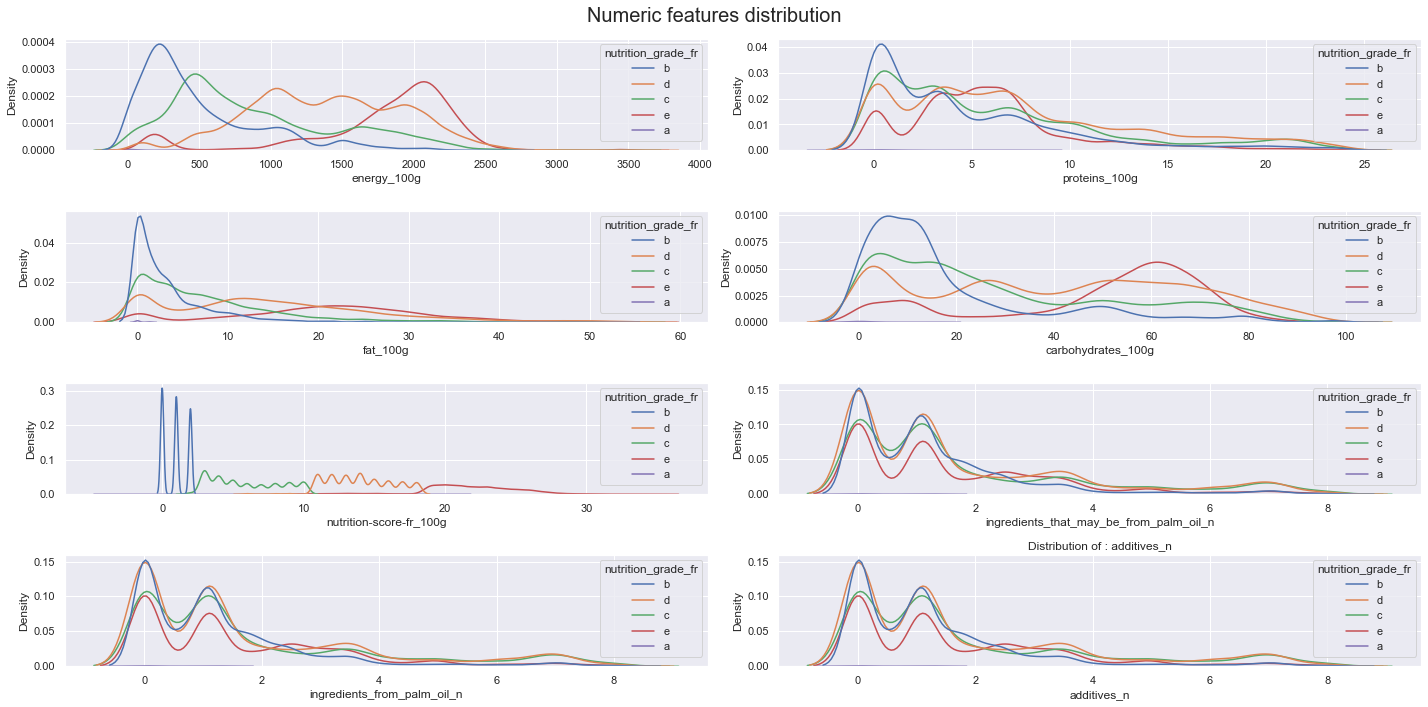

In [38]:
principal_features = ['energy_100g', 'proteins_100g', 'fat_100g', 'carbohydrates_100g',
                        'nutrition-score-fr_100g', 'ingredients_that_may_be_from_palm_oil_n',
                        'ingredients_from_palm_oil_n','additives_n']
plot_line(data, principal_features, hue="nutrition_grade_fr")

### Paire plot : Scatter plot, Histplot, and kernel density estimate (KDE) plot <a id="paire"></a>

In [39]:
def pairplot(df, features, hue):
    
    g = sns.PairGrid(df[features], hue=hue,  height=5, aspect=0.9)
    g.map_upper(sns.scatterplot)
    g.map_lower(sns.kdeplot, fill=True)
    g.map_diag(sns.histplot)
    g.add_legend()
    plt.title('Pairplot')
    plt.show()
    return

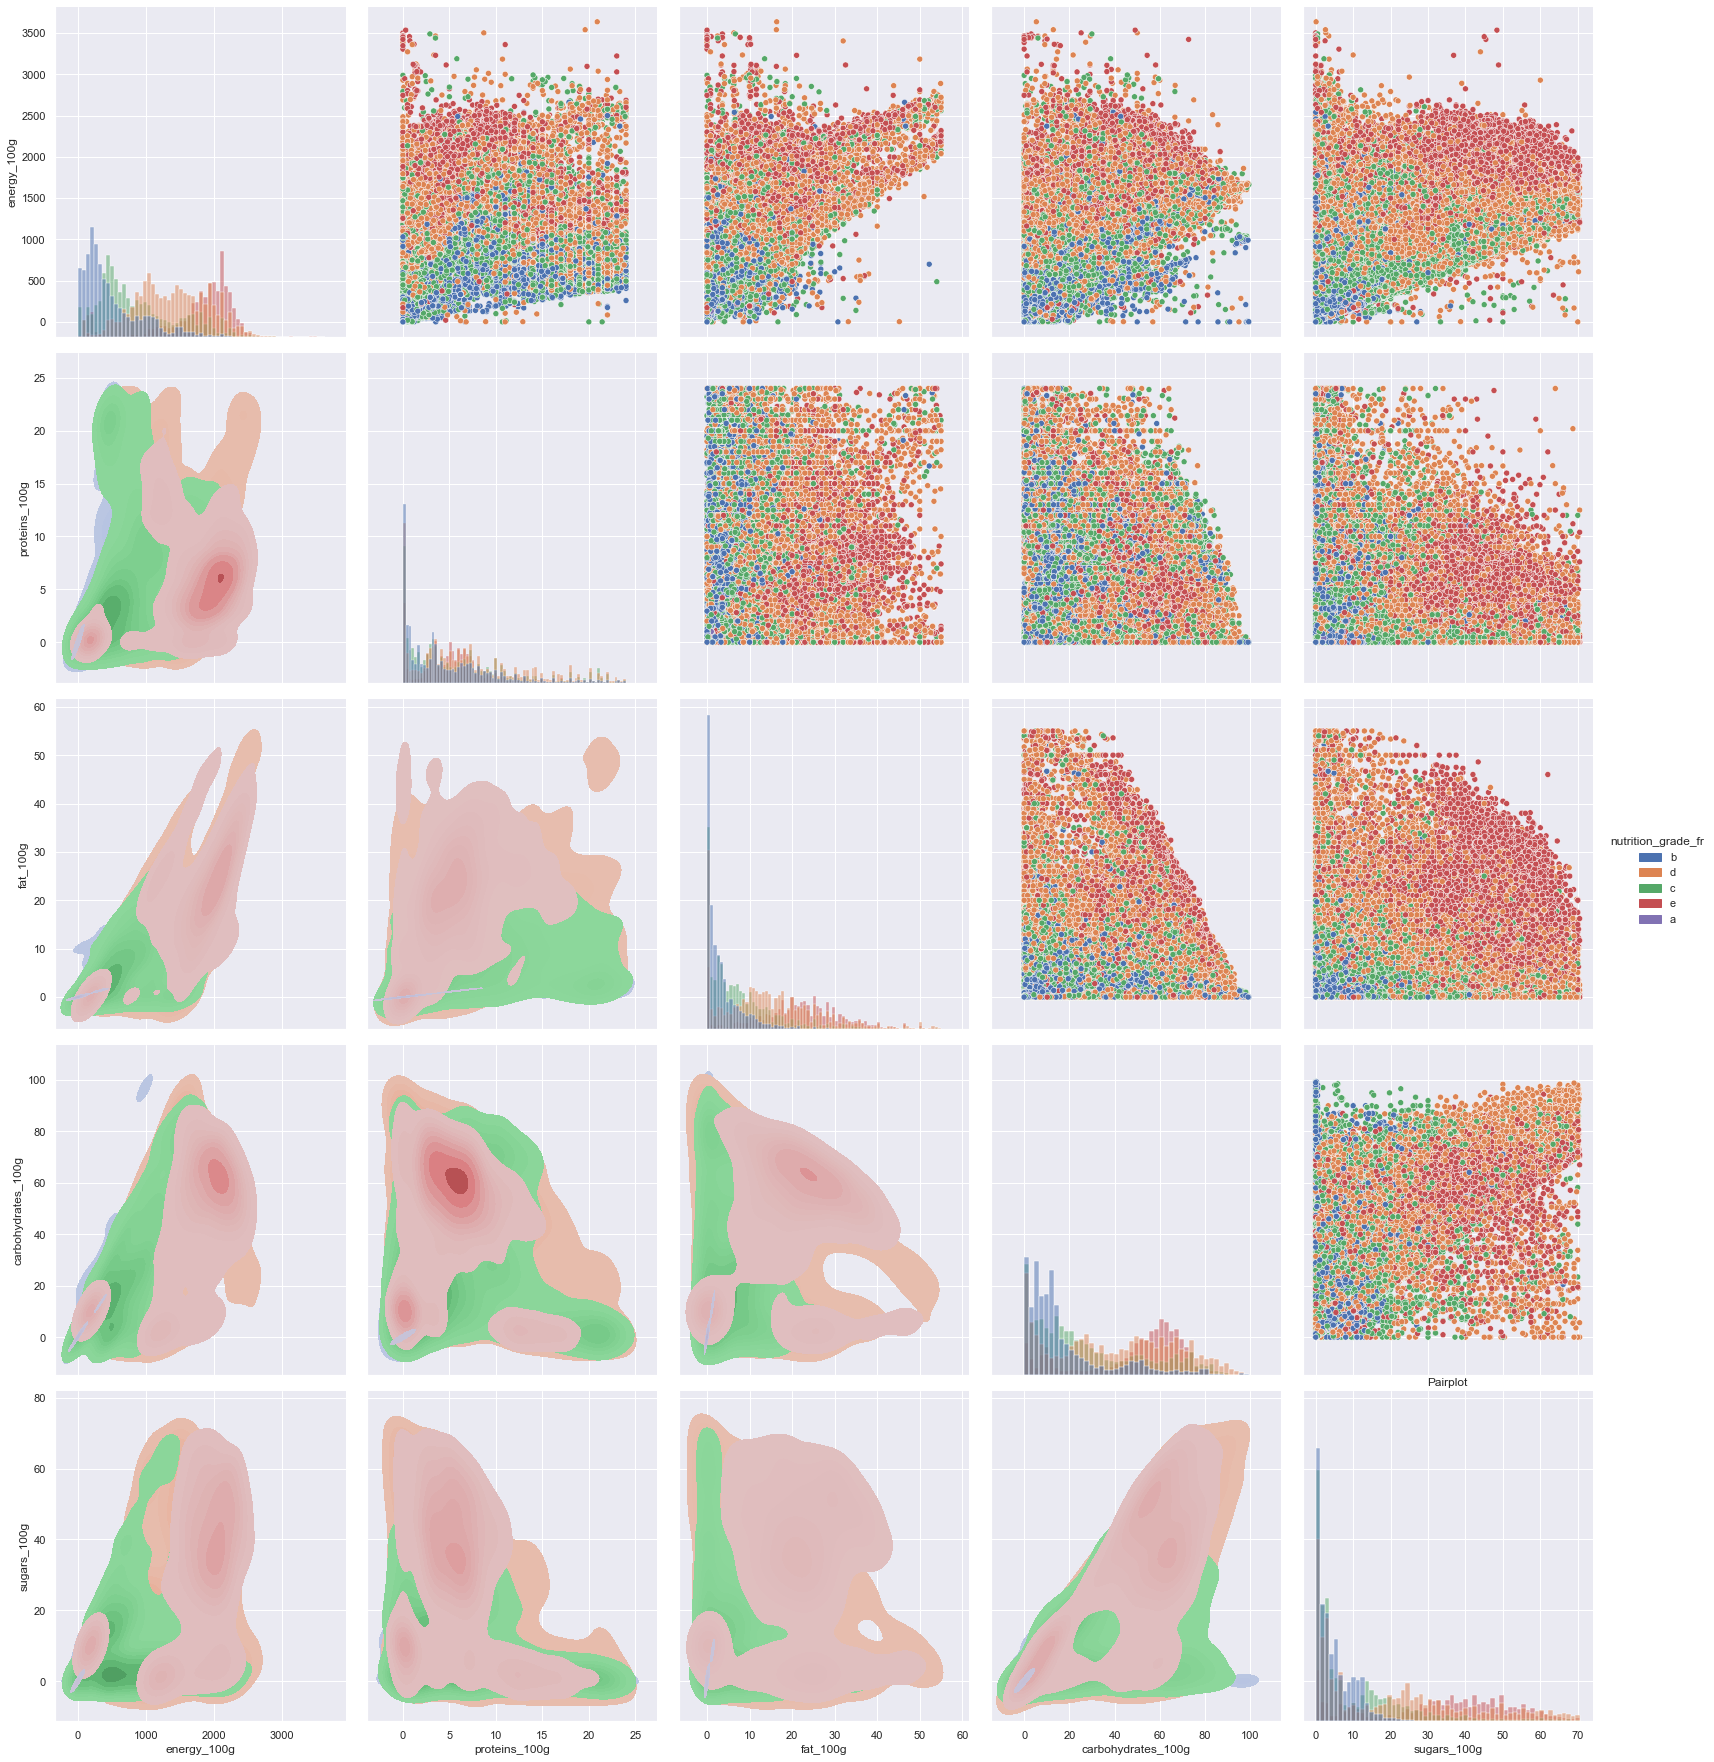

In [40]:
principal_features = ['energy_100g', 'proteins_100g', 'fat_100g', 'carbohydrates_100g', 'sugars_100g', 'nutrition_grade_fr']
#df=data[principal_features]

pairplot(data, principal_features, hue='nutrition_grade_fr')

### Correlation analysis <a id="corr"></a>

In [41]:
data.corr(method = "pearson")

,energy_100g,proteins_100g,salt_100g,sodium_100g,ingredients_that_may_be_from_palm_oil_n,ingredients_from_palm_oil_n,additives_n,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,fiber_100g,cholesterol_100g,trans-fat_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g
energy_100g,1.000000,0.345975,0.153022,0.152950,0.443637,0.443637,0.443637,0.468253,0.742806,0.721737,0.573949,0.752920,0.754828,0.443637,-0.078500,NaN,-0.015251,-0.207568,0.286408,-0.180315
proteins_100g,0.345975,1.000000,0.405954,0.405944,0.208604,0.208604,0.208604,-0.191589,0.376261,0.013072,0.228606,0.162176,0.137862,0.208604,0.178322,NaN,0.108407,-0.126723,0.228667,-0.015850
salt_100g,0.153022,0.405954,1.000000,0.999919,0.079204,0.079204,0.079204,-0.301835,0.212741,-0.028976,0.026705,0.202295,0.209724,0.079204,-0.011736,NaN,-0.105360,-0.012346,0.106547,-0.090864
sodium_100g,0.152950,0.405944,0.999919,1.000000,0.079157,0.079157,0.079157,-0.301969,0.212676,-0.029095,0.026597,0.202246,0.209724,0.079157,-0.011655,NaN,-0.105332,-0.012384,0.106541,-0.090804
ingredients_that_may_be_from_palm_oil_n,0.443637,0.208604,0.079204,0.079157,1.000000,1.000000,1.000000,0.157182,0.329529,0.364200,0.167302,0.100194,0.097579,1.000000,-0.209084,NaN,-0.005060,-0.033392,0.374644,-0.157260
ingredients_from_palm_oil_n,0.443637,0.208604,0.079204,0.079157,1.000000,1.000000,1.000000,0.157182,0.329529,0.364200,0.167302,0.100194,0.097579,1.000000,-0.209084,NaN,-0.005060,-0.033392,0.374644,-0.157260
additives_n,0.443637,0.208604,0.079204,0.079157,1.000000,1.000000,1.000000,0.157182,0.329529,0.364200,0.167302,0.100194,0.097579,1.000000,-0.209084,NaN,-0.005060,-0.033392,0.374644,-0.157260
sugars_100g,0.468253,-0.191589,-0.301835,-0.301969,0.157182,0.157182,0.157182,1.000000,0.146220,0.626339,0.303866,0.560930,0.579819,0.157182,-0.146889,NaN,-0.075873,-0.108119,0.043643,-0.167164
fat_100g,0.742806,0.376261,0.212741,0.212676,0.329529,0.329529,0.329529,0.146220,1.000000,0.224674,0.664671,0.633284,0.645506,0.329529,0.017183,NaN,0.036797,-0.148238,0.201925,-0.094374
carbohydrates_100g,0.721737,0.013072,-0.028976,-0.029095,0.364200,0.364200,0.364200,0.626339,0.224674,1.000000,0.221529,0.518787,0.495643,0.364200,-0.220881,NaN,-0.105769,-0.169050,0.238412,-0.239112


<ipython-input-42-50d2ac88bfb0>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),


<AxesSubplot:>

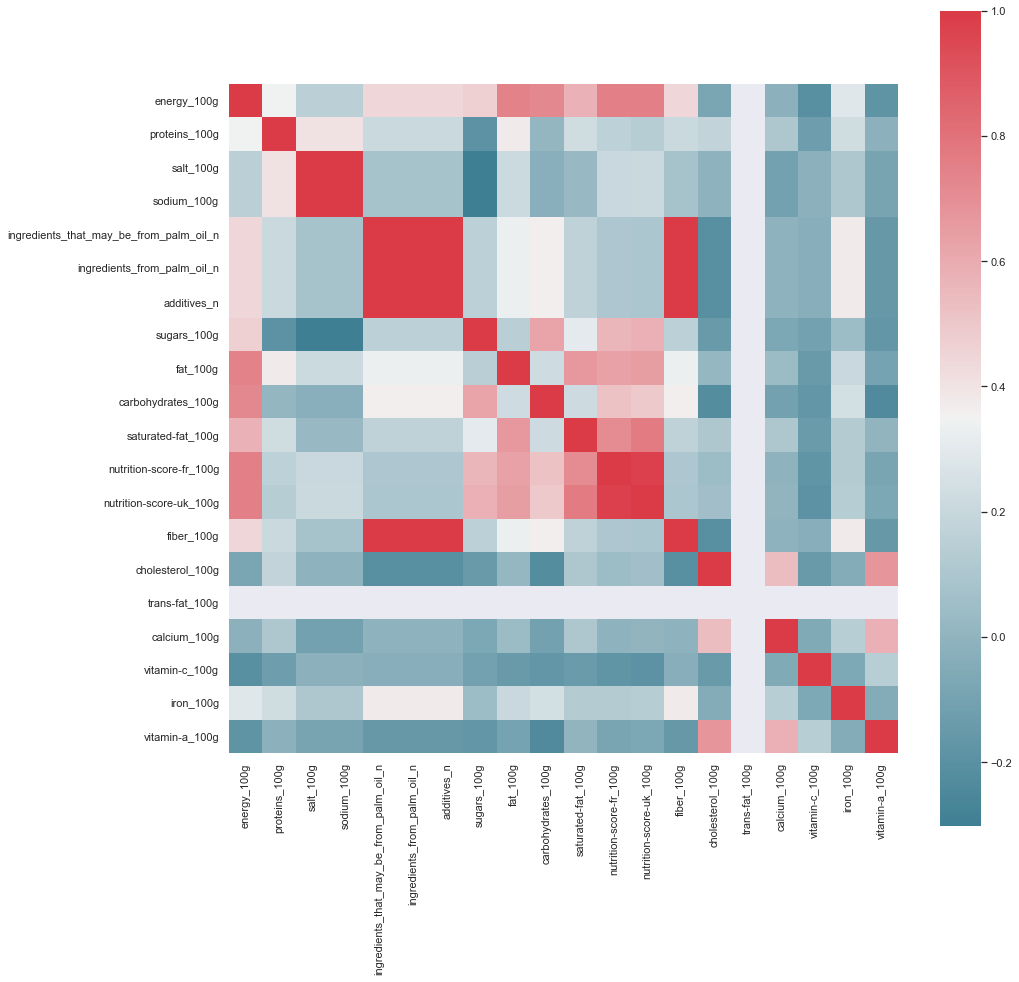

In [42]:
corr = data.corr(method = "pearson")
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

## Multivariate Analysis<a id="3"></a>

### Principal Components Analysis (PCA)<a id="pca"></a>

In [140]:
numerical_features= ['energy_100g', 'proteins_100g', 'salt_100g', 'sodium_100g',
                        'sugars_100g', 'fat_100g', 'carbohydrates_100g', 'nutrition-score-fr_100g', 'fiber_100g' ]

In [141]:
from sklearn.preprocessing import StandardScaler
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[numerical_features])

In [142]:
pca = PCA()
pca.fit(X_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print("The optimal number of components is {}".format(d))

The optimal number of components is 6


In [143]:
num_components = 5
# Create the PCA model
pca = PCA(n_components=num_components)

# Fit the model with the standardised data
pca.fit(X_scaled)
nwD=pca.transform(X_scaled)
pcs = pca.components_ 
variance = pca.explained_variance_ratio_
pca.explained_variance_ratio_.cumsum()

array([0.3909862 , 0.66641982, 0.78008352, 0.87664992, 0.93924141])

In [144]:
PCS = pd.DataFrame(pcs)
PCS

,0,1,2,3,4,5,6,7,8
0,0.504373,0.218967,0.178586,0.178535,0.264652,0.404919,0.371768,0.441147,0.258981
1,-0.086541,0.341871,0.547804,0.547841,-0.435803,0.076401,-0.268422,-0.084826,-0.020222
2,0.079417,0.369033,-0.272023,-0.272010,-0.275951,0.188833,-0.096584,-0.373482,0.669998
3,0.080372,0.272783,-0.265818,-0.265773,-0.143419,0.508771,-0.430794,0.260531,-0.494933
4,0.019195,0.758531,-0.078654,-0.078686,0.168972,-0.439119,0.294798,-0.102364,-0.305160


In [145]:
x_list = range(1, num_components+1)
PCS.columns = numerical_features
PCS.index = [f"F{i}" for i in x_list]
PCS.round(2)

,energy_100g,proteins_100g,salt_100g,sodium_100g,sugars_100g,fat_100g,carbohydrates_100g,nutrition-score-fr_100g,fiber_100g
F1,0.50,0.22,0.18,0.18,0.26,0.40,0.37,0.44,0.26
F2,-0.09,0.34,0.55,0.55,-0.44,0.08,-0.27,-0.08,-0.02
F3,0.08,0.37,-0.27,-0.27,-0.28,0.19,-0.10,-0.37,0.67
F4,0.08,0.27,-0.27,-0.27,-0.14,0.51,-0.43,0.26,-0.49
F5,0.02,0.76,-0.08,-0.08,0.17,-0.44,0.29,-0.10,-0.31


<AxesSubplot:>

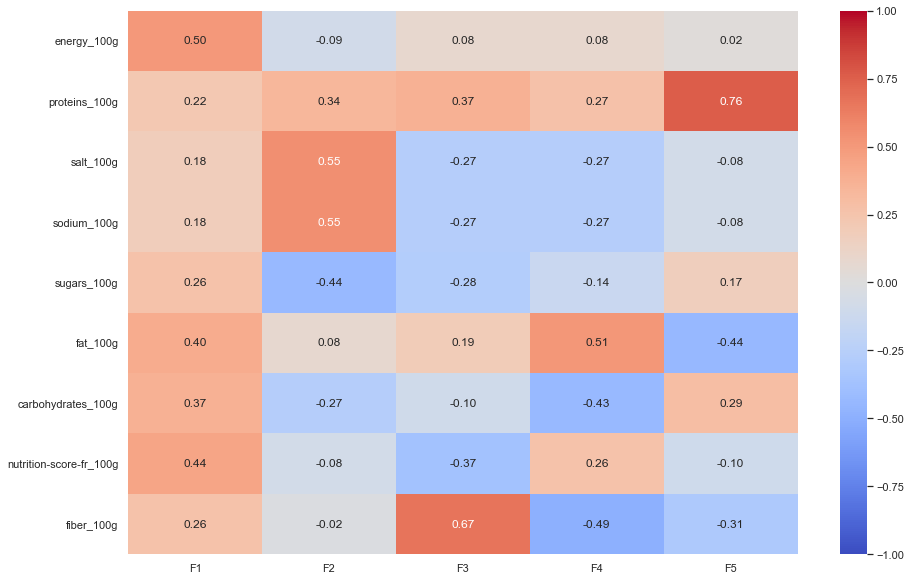

In [146]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(PCS.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

In [147]:
cov_mat = np.cov(X_scaled.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n', eigen_vals)


Eigenvalues 
 [3.51890867e+00 2.47892576e+00 1.02298291e+00 8.69105671e-01
 5.63328689e-01 3.40389555e-01 1.45090616e-01 6.12711794e-02
 8.10747689e-05]


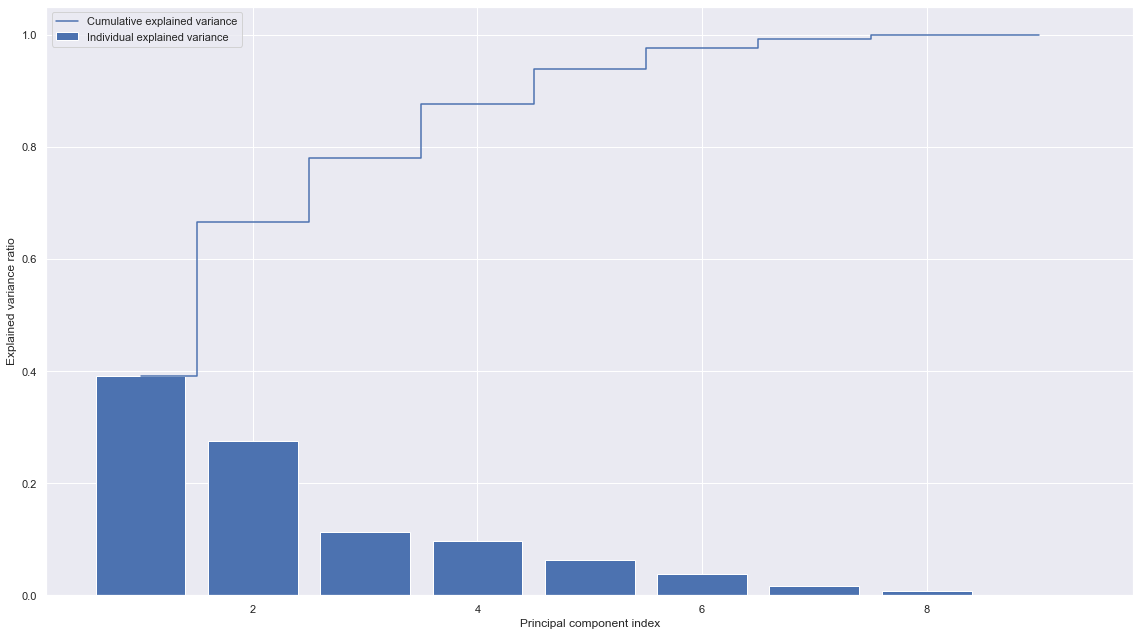

In [149]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.bar(range(1,len(numerical_features)+1), var_exp, align='center', label='Individual explained variance')
plt.step(range(1,len(numerical_features)+1), cum_var_exp, where='mid',  label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [155]:
 # Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [156]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.50437297 -0.08654075]
 [-0.21896734  0.34187062]
 [-0.17858553  0.54780383]
 [-0.17853491  0.54784145]
 [-0.26465248 -0.43580308]
 [-0.40491873  0.07640097]
 [-0.37176788 -0.26842157]
 [-0.44114721 -0.0848257 ]
 [-0.25898141 -0.02022163]]


In [157]:
X_pca = X_scaled.dot(w)
X_pca

array([[-2.17188896,  0.24246978],
       [-1.18708606, -0.50782156],
       [-2.75560307, -0.12420025],
       ...,
       [ 0.19249762, -0.07196989],
       [ 3.2645647 , -0.58749998],
       [ 0.5421916 , -1.05967484]])

In [158]:

def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(15, 15))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[0, i],  
                pca.components_[1, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[0, i] + 0.05,
                pca.components_[1, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)



def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en un df
    X_ = pd.DataFrame(X_projected)
    
    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # On définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    # On rajoute la color, les clusters et les labels à X_
    X_["clusters"] =  clusters if clusters is not None else "None" 
    X_["labels"] =  labels if labels is not None else "None"
    c_unique_list = X_["clusters"].sort_values().unique()
    c_dict = {j:i+1 for i, j in enumerate(c_unique_list)}
    X_["colors"] = X_["clusters"].apply(lambda i : c_dict[i])

    # Pour chaque couleur / cluster
    for c in sorted(X_.clusters.unique()) : 
        # On selectionne le sous DF
        sub_X =X_.loc[X_.clusters == c, : ]

        # Clusters and color
        cluster = sub_X.clusters.iloc[0]
        color = sub_X.colors.iloc[0]

        # On affiche les points
        ax.scatter(    sub_X.iloc[:, x], 
                        sub_X.iloc[:, y], 
                        alpha=alpha, 
                        label = cluster ,
                        cmap="Set1", 
                        marker=marker)
        
    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_.iloc[:, x]).max() *1.1
    y_max = np.abs(X_.iloc[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if labels : 
    
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y, labels[i], fontsize='14', ha='center',va='center') 

    # Titre, legend et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    if clusters is not None: 
        plt.legend()
    plt.show()


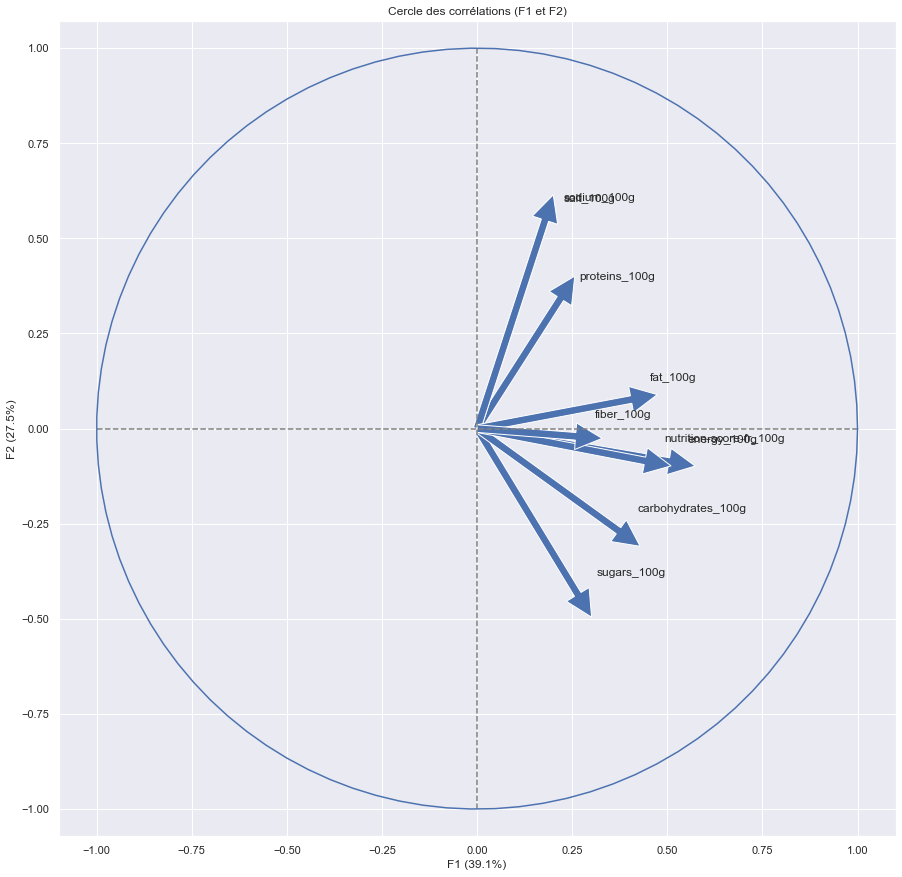

In [159]:
x_y = (0,1)
correlation_graph(pca, x_y, numerical_features)

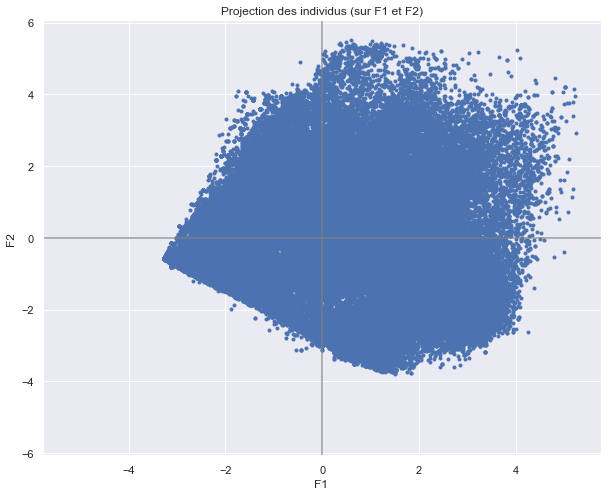

In [160]:
X_proj = pca.transform(X_scaled)
X_proj
x_y = [0,1]
display_factorial_planes(X_proj[:], x_y)

Let's project the row coordinate in a plane by using nutrition grade. For the sake of better representation, we use only 1000 sample.

In [161]:
df = data.dropna(subset=["nutrition_grade_fr"])
scaler = StandardScaler()
X_reduced = scaler.fit_transform(df[numerical_features])
y=df.nutrition_grade_fr

In [162]:
import prince
pca = prince.PCA( n_components=5, 
                    n_iter=3,
                     rescale_with_mean=True,
                    rescale_with_std=True,
                    copy=True,
                    check_input=True,
                     engine='auto',
                    random_state=42)
pca = pca.fit(X_reduced[:1000])

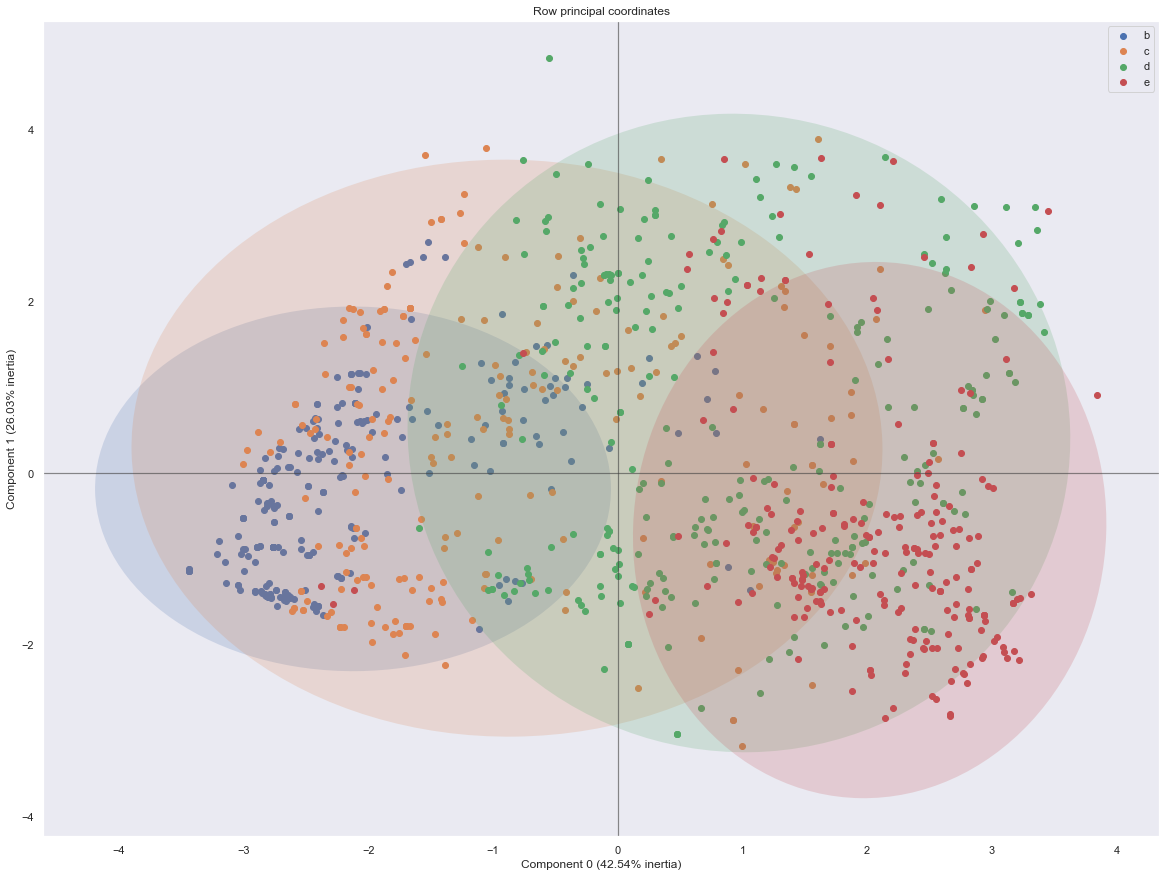

In [163]:
ax = pca.plot_row_coordinates(X_reduced[:1000],
                    ax=None,
                    figsize=(20, 15),
                    x_component=0,
                    y_component=1,
                    labels=None,
                    color_labels=y[:1000],
                    ellipse_outline=False,
                    ellipse_fill=True,
                    show_points=True)
ax.get_figure().savefig('pca_row_coordinates.svg')

The second component contributes to explain the healthy products (the relation is negative).
The first component explain explain mostly the unhealthy products.

More the product is healthy, the second component have a great contribution more it is unhealthy, the second component and the first one contribute on different level.

### Multiple Correspondence Analysis (MCA) <a id="mca"></a>

In [166]:

df[['nutrition_grade', 'group_1', "group_2"]] = df[['nutrition_grade_fr', "pnns_groups_1", "pnns_groups_2"]]
X = df[['nutrition_grade_fr', 'group_1', "group_2"]].dropna()
#X = X[:16600]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29343 entries, 27 to 106988
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   nutrition_grade_fr  29343 non-null  object
 1   group_1             29343 non-null  object
 2   group_2             29343 non-null  object
dtypes: object(3)
memory usage: 917.0+ KB


c:\Users\Adonija\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


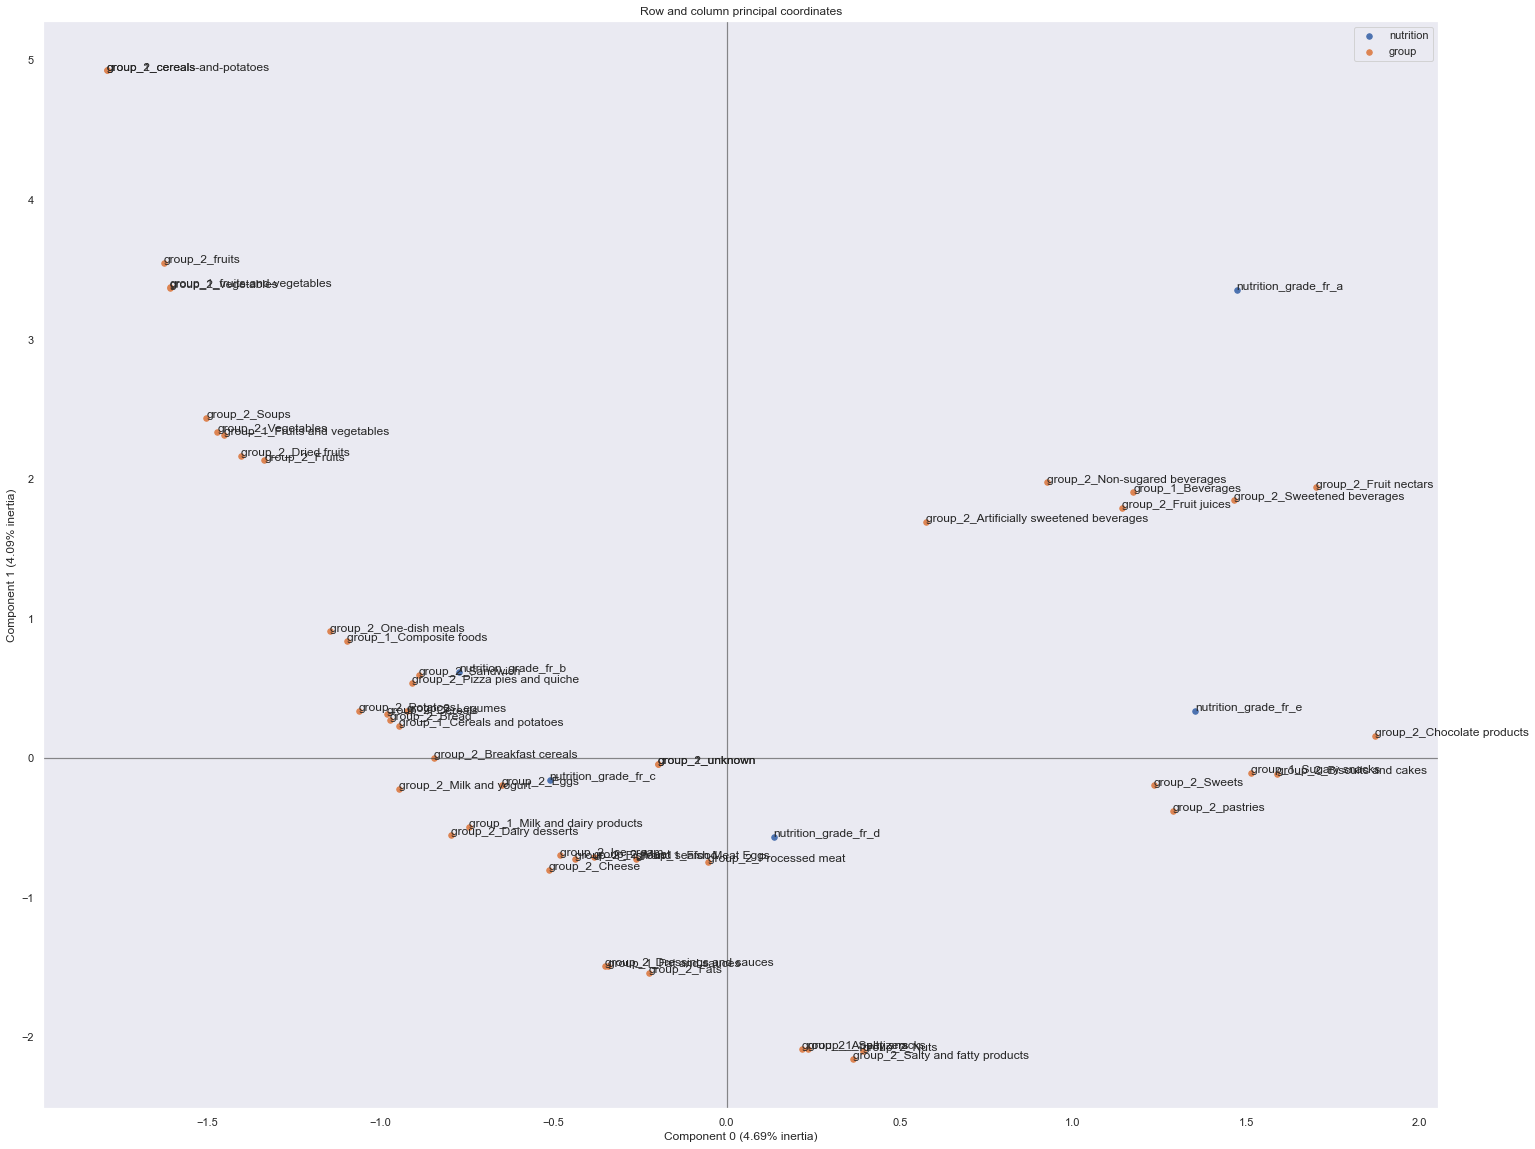

In [167]:
import prince
mca = prince.MCA()
mca_data = mca.fit(X)
mca_X = mca_data.transform(X)

ax = mca.plot_coordinates(X=X, ax=None, figsize=(25,20), show_row_points=False, row_points_size=10,
                            show_row_labels=False, show_column_points=True,  column_points_size=30, 
                            show_column_labels=True, legend_n_cols=1)

In our MCA, we can see that the horizontal line separates the products of **vegetable origin** at the upper part of the line, from the products of **animal origin** at the lower part of the line.

The vertical line separates the product the **healthy products** at left of the line, from the **unhealthy products** at right of the line

# Statistics tests<a id="4"></a>

### Chi2 Test <a id="chi"></a>

In [77]:
from scipy.stats import chi2_contingency, chi2
def chi2_test(serie1, serie2):

    alpha = 0.05

    # H0 : The features are independent

    tab_contingence = pd.crosstab(serie1.array, serie2.array)
    stat_chi2, p_value, dof, expected_table = chi2_contingency(
        tab_contingence.values)
    print('chi2 : {0:.5f}'.format(stat_chi2))
    print('\np_value : {0:.5f}'.format(p_value))
    print('\ndof : {0:.5f}\n'.format(dof))
    critical = chi2.ppf(1 - alpha, dof)
    print('critical : ', critical)

    if p_value <= alpha:
        print(
            '{} and {} are not indépendent (We reject null hypothesis) since p_value = {} <= alpha = {}'.format(serie1.name, serie2.name, p_value, alpha))
    else:
        print('{} and {} are independent (We cannot reject H0) since p = {} >= alpha = {}'.format(serie1.name, serie2.name, p_value, alpha))



def independence_test(data, principal, features):

    for feature in features:
        print("________________________________________________________________________________________________________________________________________________")
        print("Chi-Square Independence Test for {} and {}".format(principal, feature))
        
        chi2_test(data[principal], data[feature])

        print("________________________________________________________________________________________________________________________________________________")
    return

In [78]:

cat = ['pnns_groups_2', 'pnns_groups_1', 'countries', 'categories_fr', 'additives_fr']
independence_test(data, 'nutrition_grade_fr', cat)

________________________________________________________________________________________________________________________________________________
Chi-Square Independence Test for nutrition_grade_fr and pnns_groups_2
chi2 : 18517.62837

p_value : 0.00000

dof : 156.00000

critical :  186.14575078141743
nutrition_grade_fr and pnns_groups_2 are not indépendent (We reject null hypothesis) since p_value = 0.0 <= alpha = 0.05
________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________
Chi-Square Independence Test for nutrition_grade_fr and pnns_groups_1
chi2 : 11171.42305

p_value : 0.00000

dof : 44.00000

critical :  60.480886582336446
nutrition_grade_fr and pnns_groups_1 are not indépendent (We reject null hypothesis) since p_value = 0.0 <= alpha = 0.05
__________

### Normality Test<a id="norm"></a>

In [79]:
from scipy import stats
numeric_columns = data.select_dtypes(include = ['int32','float64']).columns
#numeric_columns = numeric_columns[1:]
for column in numeric_columns:
    print('________\n{}'.format(column))
    k2, p = stats.normaltest(data[column], 
                             axis=0,
                             nan_policy = 'omit')
    alpha = 5e-2
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothesis: the feature distribution is normal
        print("Null hypotesis rejected: {} is not a normal distribution at {}percent".format(column, 100-alpha*100))
    else:
        print("Cannot reject null hypotesis :{}, is a normal distribiution with {} percent of error".format(column, alpha*100))

________
energy_100g
p = 0
Null hypotesis rejected: energy_100g is not a normal distribution at 95.0percent
________
proteins_100g
p = 0
Null hypotesis rejected: proteins_100g is not a normal distribution at 95.0percent
________
salt_100g
p = 0
Null hypotesis rejected: salt_100g is not a normal distribution at 95.0percent
________
sodium_100g
p = 0
Null hypotesis rejected: sodium_100g is not a normal distribution at 95.0percent
________
ingredients_that_may_be_from_palm_oil_n
p = 0
Null hypotesis rejected: ingredients_that_may_be_from_palm_oil_n is not a normal distribution at 95.0percent
________
ingredients_from_palm_oil_n
p = 0
Null hypotesis rejected: ingredients_from_palm_oil_n is not a normal distribution at 95.0percent
________
additives_n
p = 0
Null hypotesis rejected: additives_n is not a normal distribution at 95.0percent
________
sugars_100g
p = 0
Null hypotesis rejected: sugars_100g is not a normal distribution at 95.0percent
________
fat_100g
p = 0
Null hypotesis rejected:

### Analysis Of Variance (ANOVA)<a id="anova"></a>

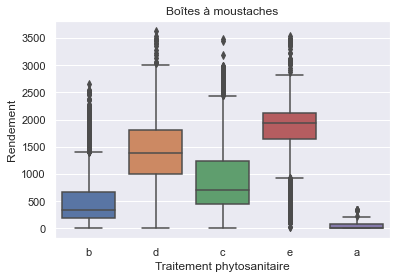

In [80]:
ax = sns.boxplot(x='nutrition_grade_fr', y="energy_100g", data=data)
plt.xlabel('Traitement phytosanitaire')
plt.ylabel('Rendement')
plt.title('Boîtes à moustaches')
plt.show()

In [81]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
anova_grade = smf.ols('energy_100g~nutrition_grade_fr', data=data).fit()
print(anova_grade.summary())
sm.stats.anova_lm(anova_grade, typ=2)

                            OLS Regression Results                            
Dep. Variable:            energy_100g   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                 1.527e+04
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:12:08   Log-Likelihood:            -6.1336e+05
No. Observations:               79705   AIC:                         1.227e+06
Df Residuals:                   79700   BIC:                         1.227e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

,sum_sq,df,F,PR(>F)
nutrition_grade_fr,1.728057e+10,4.0,15270.200542,0.0
Residual,2.254818e+10,79700.0,NaN,NaN


The nutrition grade have an effect on food energy

In [86]:
anova_group1= smf.ols('energy_100g~nutrition_grade_fr*pnns_groups_1', data=data).fit()
print(anova_group1.summary())
sm.stats.anova_lm(anova_group1, typ=2)

                            OLS Regression Results                            
Dep. Variable:            energy_100g   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     1985.
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:15:40   Log-Likelihood:            -2.1375e+05
No. Observations:               29343   AIC:                         4.276e+05
Df Residuals:                   29298   BIC:                         4.280e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

c:\Users\Adonija\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '
c:\Users\Adonija\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 11, but rank is 6
  warnings.warn('covariance of constraints does not have full '
c:\Users\Adonija\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 44, but rank is 7
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
nutrition_grade_fr,-7.851456e+08,4.0,-1575.089536,1.000000
pnns_groups_1,1.959461e+00,11.0,0.000001,1.000000
nutrition_grade_fr:pnns_groups_1,4.576562e+06,44.0,0.834645,0.558264
Residual,3.651094e+09,29298.0,NaN,NaN


Our results show that there is an interaction between the pnns_group and nutrition grade on enrgy give by the nutrition.

In [87]:
data["nutrition_score_fr_100g"] = data["nutrition-score-fr_100g"]
anova_energy_group = smf.ols('nutrition_score_fr_100g~pnns_groups_1*nutrition_grade_fr', data=data).fit()
print(anova_energy_group.summary())
sm.stats.anova_lm(anova_energy_group)

                               OLS Regression Results                              
Dep. Variable:     nutrition_score_fr_100g   R-squared:                       0.926
Model:                                 OLS   Adj. R-squared:                  0.926
Method:                      Least Squares   F-statistic:                     8191.
Date:                     Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                             15:16:28   Log-Likelihood:                -63366.
No. Observations:                    29343   AIC:                         1.268e+05
Df Residuals:                        29297   BIC:                         1.272e+05
Df Model:                               45                                         
Covariance Type:                 nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

,df,sum_sq,mean_sq,F,PR(>F)
pnns_groups_1,11.0,5.479040e+05,49809.450249,11308.081959,0.0
nutrition_grade_fr,4.0,1.055085e+06,263771.327216,59883.170196,0.0
pnns_groups_1:nutrition_grade_fr,44.0,2.066344e+04,469.623626,106.617166,0.0
Residual,29297.0,1.290464e+05,4.404766,NaN,NaN


In [ ]:
data["nutrition_score_fr_100g"] = data["nutrition-score-fr_100g"]
anova_energy_group = smf.ols('nutrition_score_fr_100g~categories', data=data).fit()
print(anova_energy_group.summary())
sm.stats.anova_lm(anova_energy_group)

# Feasibility of the application<a id="5"></a>

Withe these different analysis, we can see that we have a lot of feature which can be use to accompany the community to a diet not only capable of preventing type 1 diabetes, but also in accordance with their allergy, their need for a food etc.

In example, we can propose a diet to a pregnant woman who want to know a diet that prevent the diabet and take into account her pregnancy condition. Then, she may need a know some products that are healthy, poor in sugar (the sugar level is determine by the doctor), with a certain carbohydrates level (define by the doctor) and rich in Iron.

In [169]:
condition_1 = data['nutrition_grade_fr'].isin(["a", "b", "c"])
condition_2 = data['sugars_100g'].between(0, 5)
condition_3 = data["fiber_100g"].between(0.001  , 100)
condition_4 = data["iron_100g"].between(0.0001, 100)
condition_5 = data['carbohydrates_100g'].between(10, 50)

df_optimal = data.loc[condition_1 & condition_2 & condition_3 & condition_4 & condition_5, ['pnns_groups_1', 'pnns_groups_2',
                                              'product_name', 'fat_100g',
                                              'nutrition_grade_fr', "fiber_100g", "iron_100g", 'sugars_100g', "carbohydrates_100g"]] \
    .sort_values(['fiber_100g', 'nutrition_grade_fr'], ascending=False)
df_optimal.head(10).style.hide_index()

pnns_groups_1,pnns_groups_2,product_name,fat_100g,nutrition_grade_fr,fiber_100g,iron_100g,sugars_100g,carbohydrates_100g
Salty snacks,Appetizers,Petits crackers sans cuisson Olives & Oignon,21.110000,c,8.240000,0.001241,1.500000,25.840000
unknown,unknown,Mélange salade,48.000000,c,8.200000,0.001241,2.900000,17.000000
nan,nan,"Flavored Popcorn, Spicy Jalapeno Ranch",32.260000,c,8.100000,0.001450,4.030000,48.390000
Cereals and potatoes,Bread,pain au sarrasin,7.300000,c,8.100000,0.001241,3.500000,44.000000
nan,nan,Pain Sarrasin & Multi-graines SANS GLUTEN,4.020000,c,8.100000,0.001241,3.500000,18.140000
nan,nan,Country Seeded Bread,5.650000,b,8.100000,0.002320,4.840000,50.000000
nan,nan,Fajita Size Whole Wheat Tortillas,8.000000,c,8.000000,0.002160,4.000000,50.000000
nan,nan,Nairns Rough Oatcake,8.840000,c,8.000000,0.001241,1.300000,35.100000
nan,nan,Raw Natural Trail Mix,52.000000,c,8.000000,0.003600,4.000000,26.000000
nan,nan,"Siete, Almond Flour Tortillas",28.000000,c,8.000000,0.002361,4.000000,40.000000


In [170]:
df_optimal.dropna()

,pnns_groups_1,pnns_groups_2,product_name,fat_100g,nutrition_grade_fr,fiber_100g,iron_100g,sugars_100g,carbohydrates_100g
85267,Salty snacks,Appetizers,Petits crackers sans cuisson Olives & Oignon,21.110,c,8.24,0.001241,1.5,25.84
83680,unknown,unknown,Mélange salade,48.000,c,8.20,0.001241,2.9,17.00
60284,Cereals and potatoes,Bread,pain au sarrasin,7.300,c,8.10,0.001241,3.5,44.00
105774,unknown,unknown,Beurre de noix mélangées - BioWise - 250 g,49.000,c,8.00,0.001241,4.9,18.50
99026,Cereals and potatoes,Bread,Classic - Petits pains avec farine complète,4.000,b,8.00,0.001241,4.0,40.00
...,...,...,...,...,...,...,...,...,...
61902,Beverages,Non-sugared beverages,Boisson au Riz Calcium,1.300,b,0.10,0.000850,4.6,11.00
66332,Beverages,Non-sugared beverages,Boisson au Riz,1.300,b,0.10,0.000850,5.0,11.00
76379,unknown,unknown,Filets de maquereaux blancs,10.704,b,0.10,0.001241,0.2,44.86
93152,Beverages,Non-sugared beverages,Rice drink the original,0.900,b,0.05,0.001241,5.0,12.00


# Conclusion

* Data availability : all require feature are available. The data can also take into account most the allergy, the nutriments need and so on... 
* Relationship between categorical features and healthy diet: We can analyse the product categories which can prevent diabetes  
* Relationship between features : To have equilibrium diet
* Statistical test : confirm the relationship


* **Principal features** : 

    * energy_100g, proteins_100g, fat_100g, carbohydrates_100g,  nutrition-score-fr_100g
    * 'nutrition_grade_fr', "pnns_groups_1",  "pnns_groups_2"

* **Controling features**:
    * salt_100g, sodium_100g, sugars_100g, saturated-fat_100g, fiber_100g, trans-fat_100g

* **Secondary features** : 
    * For allergy or preference: ingredients_that_may_be_from_palm_oil_n, ingredients_from_palm_oil_n, additives_n, categories


* Other_features :
    * cholesterol_100g, trans-fat_100g, calcium_100g, vitamin-c_100g, iron_100g, vitamin-a_100g

### ATTENTION !

* Attention must be paid on data reporting
* Nan filling method can biased the analysis
